In [2]:
import torch
from torch import optim
from torch import nn
import timm

In [2]:
model = timm.create_model("tf_efficientnet_b0")
optimizer = optim.Adam(model.parameters())

In [33]:
from typing import List

def update_model(model: nn.Module, source_models: List[nn.Module],
                 cumulative_losses: torch.Tensor, alpha: float):
    probabilites = torch.exp(-alpha*(cumulative_losses-cumulative_losses.min()))
    probabilites /= torch.sum(probabilites)
    
    source_params = [source_model.parameters() for source_model in source_models]
    for params in zip(model.parameters(), *source_params):
        stacked_params = torch.stack([prob * x.data for prob, x in zip(probabilites, params[1:])])
        params[0].data[:] = torch.sum(stacked_params, dim=0)

n = 10
source_models = []
for _ in range(n):
    source_models.append(timm.create_model('tf_efficientnet_b0'))
model = timm.create_model('tf_efficientnet_b0')
update_model(model, source_models, torch.arange(n), 100)

tensor([[[ 0.0158,  0.0305,  0.0415],
         [ 0.0868,  0.0881, -0.1769],
         [-0.0976, -0.0252,  0.0971]],

        [[ 0.0640, -0.1180, -0.0581],
         [-0.0482,  0.0112, -0.0368],
         [ 0.0389, -0.0640, -0.1544]],

        [[-0.0182,  0.0789, -0.0435],
         [-0.0208,  0.0387, -0.0584],
         [ 0.0261, -0.1111,  0.1362]]])
tensor([[[ 0.0158,  0.0305,  0.0415],
         [ 0.0868,  0.0881, -0.1769],
         [-0.0976, -0.0252,  0.0971]],

        [[ 0.0640, -0.1180, -0.0581],
         [-0.0482,  0.0112, -0.0368],
         [ 0.0389, -0.0640, -0.1544]],

        [[-0.0182,  0.0789, -0.0435],
         [-0.0208,  0.0387, -0.0584],
         [ 0.0261, -0.1111,  0.1362]]])
tensor(1.)
tensor(1.)
tensor(0.)
tensor(0.)
tensor([[[-0.0238, -0.3057,  0.0577],
         [ 0.0762, -0.1114,  0.4942],
         [ 0.1195, -0.3558, -0.7963]]])
tensor([[[-0.0238, -0.3057,  0.0577],
         [ 0.0762, -0.1114,  0.4942],
         [ 0.1195, -0.3558, -0.7963]]])
tensor(1.)
tensor(1.)
tensor

tensor([[[ 1.2461e-01]],

        [[ 2.7130e-01]],

        [[ 1.3969e-01]],

        [[-6.7950e-02]],

        [[-1.2448e-01]],

        [[-1.8348e-01]],

        [[-1.0447e-03]],

        [[-1.8951e-01]],

        [[-5.0308e-02]],

        [[ 1.5969e-01]],

        [[ 2.4691e-01]],

        [[ 6.8516e-02]],

        [[ 2.4476e-01]],

        [[ 1.6412e-02]],

        [[-1.5651e-02]],

        [[ 1.6307e-01]],

        [[-1.9171e-01]],

        [[ 1.6361e-01]],

        [[ 8.4439e-03]],

        [[-2.7449e-01]],

        [[-1.1158e-01]],

        [[-6.6172e-02]],

        [[ 1.7992e-01]],

        [[-3.0594e-02]],

        [[ 3.5353e-03]],

        [[-6.4916e-02]],

        [[ 4.6215e-03]],

        [[ 8.9707e-02]],

        [[-2.6100e-02]],

        [[-6.8503e-02]],

        [[ 4.8828e-02]],

        [[ 2.5549e-02]],

        [[-8.5790e-02]],

        [[ 1.5945e-01]],

        [[ 9.5514e-02]],

        [[-1.3589e-01]],

        [[ 1.5037e-01]],

        [[-1.5648e-02]],

        [[-1

tensor([[[ 1.6141e-01]],

        [[-9.1515e-02]],

        [[ 1.2502e-01]],

        [[-7.3175e-02]],

        [[-6.3712e-02]],

        [[ 1.6464e-01]],

        [[-4.3605e-02]],

        [[ 7.1862e-02]],

        [[-2.1381e-01]],

        [[ 1.2160e-01]],

        [[-1.0106e-01]],

        [[ 1.3819e-01]],

        [[-4.9159e-02]],

        [[ 8.1466e-03]],

        [[-1.6584e-01]],

        [[ 1.5812e-01]],

        [[ 9.0873e-02]],

        [[-2.7406e-01]],

        [[ 4.4699e-02]],

        [[-8.9591e-02]],

        [[ 1.5091e-01]],

        [[-5.0097e-02]],

        [[-9.5877e-02]],

        [[ 4.0430e-02]],

        [[-2.8598e-01]],

        [[-2.1632e-01]],

        [[ 1.0234e-01]],

        [[-6.1780e-02]],

        [[ 1.9818e-01]],

        [[-6.1347e-02]],

        [[ 3.2135e-02]],

        [[-1.4757e-02]],

        [[ 8.6704e-02]],

        [[-1.4680e-01]],

        [[-1.8482e-01]],

        [[ 1.1790e-01]],

        [[-2.5615e-02]],

        [[ 6.5275e-03]],

        [[ 2

tensor([[[ 0.0253]],

        [[ 0.0931]],

        [[-0.0049]],

        [[ 0.0605]],

        [[-0.0236]],

        [[ 0.0198]],

        [[-0.0250]],

        [[-0.0064]],

        [[ 0.0012]],

        [[-0.0099]],

        [[ 0.0143]],

        [[ 0.0089]],

        [[-0.0347]],

        [[-0.0460]],

        [[ 0.0250]],

        [[-0.0285]],

        [[ 0.0552]],

        [[ 0.0087]],

        [[-0.0240]],

        [[ 0.0321]],

        [[-0.0761]],

        [[-0.0552]],

        [[ 0.0871]],

        [[ 0.0558]],

        [[ 0.0691]],

        [[-0.0308]],

        [[ 0.0046]],

        [[-0.0065]],

        [[ 0.0441]],

        [[ 0.0075]],

        [[-0.0323]],

        [[ 0.0011]],

        [[ 0.0455]],

        [[-0.0593]],

        [[ 0.0680]],

        [[ 0.0431]],

        [[-0.0136]],

        [[ 0.0514]],

        [[ 0.0479]],

        [[-0.0625]],

        [[-0.0190]],

        [[ 0.0387]],

        [[-0.0167]],

        [[ 0.0312]],

        [[-0.0017]],

        [[

In [5]:
for group in optimizer.param_groups:
    print(group['lr'])

0.001


In [8]:
type(optimizer.param_groups[0]['lr'])

float

In [3]:
def _fetch_gradients(optimizer):
  gradients = []
  for param_group in optimizer.__getstate__()['param_groups']:
    for group, params in param_group.items():
      if group == 'params':
        for p in params:
          if isinstance(p, torch.Tensor) and p.grad is not None:
            gradients.append(p.grad.data)
  return gradients

In [36]:
x = torch.randn(2, 3, 224, 224)
y = torch.tensor([0, 1])
y_pred = model(x)
loss = nn.CrossEntropyLoss()(y_pred, y)
loss.backward()

In [13]:
g = _fetch_gradients(optimizer)

In [19]:
len(g)

213

In [18]:
for entry in g:
    print(type(entry), entry.shape)

<class 'torch.Tensor'> torch.Size([32, 3, 3, 3])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([32, 1, 3, 3])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([8, 32, 1, 1])
<class 'torch.Tensor'> torch.Size([8])
<class 'torch.Tensor'> torch.Size([32, 8, 1, 1])
<class 'torch.Tensor'> torch.Size([32])
<class 'torch.Tensor'> torch.Size([16, 32, 1, 1])
<class 'torch.Tensor'> torch.Size([16])
<class 'torch.Tensor'> torch.Size([16])
<class 'torch.Tensor'> torch.Size([96, 16, 1, 1])
<class 'torch.Tensor'> torch.Size([96])
<class 'torch.Tensor'> torch.Size([96])
<class 'torch.Tensor'> torch.Size([96, 1, 3, 3])
<class 'torch.Tensor'> torch.Size([96])
<class 'torch.Tensor'> torch.Size([96])
<class 'torch.Tensor'> torch.Size([4, 96, 1, 1])
<class 'torch.Tensor'> torch.Size([4])
<class 'torch.Tensor'> torch.Size([96, 4, 1, 1])
<class 'torch.Tensor'> torch.Size([96])

In [25]:
model.conv_stem.weight.grad.requires_grad

False

In [39]:
grads = torch.cat([p.grad.flatten() for p in model.parameters()])

In [40]:
grads[:10]

tensor([-0.0526,  0.0446, -0.0270,  0.1196,  0.2208, -0.0010, -0.1027, -0.1328,
         0.1756, -0.0032])

In [38]:
next(model.parameters()).grad.flatten()[:10]

tensor([-0.0526,  0.0446, -0.0270,  0.1196,  0.2208, -0.0010, -0.1027, -0.1328,
         0.1756, -0.0032])

In [49]:
import numpy as np
a = 1e-5
b = 1e-1
n_steps = 49
lrs = np.exp(np.linspace(np.log(a), np.log(b), n_steps))
lrs

array([1.00000000e-05, 1.21152766e-05, 1.46779927e-05, 1.77827941e-05,
       2.15443469e-05, 2.61015722e-05, 3.16227766e-05, 3.83118685e-05,
       4.64158883e-05, 5.62341325e-05, 6.81292069e-05, 8.25404185e-05,
       1.00000000e-04, 1.21152766e-04, 1.46779927e-04, 1.77827941e-04,
       2.15443469e-04, 2.61015722e-04, 3.16227766e-04, 3.83118685e-04,
       4.64158883e-04, 5.62341325e-04, 6.81292069e-04, 8.25404185e-04,
       1.00000000e-03, 1.21152766e-03, 1.46779927e-03, 1.77827941e-03,
       2.15443469e-03, 2.61015722e-03, 3.16227766e-03, 3.83118685e-03,
       4.64158883e-03, 5.62341325e-03, 6.81292069e-03, 8.25404185e-03,
       1.00000000e-02, 1.21152766e-02, 1.46779927e-02, 1.77827941e-02,
       2.15443469e-02, 2.61015722e-02, 3.16227766e-02, 3.83118685e-02,
       4.64158883e-02, 5.62341325e-02, 6.81292069e-02, 8.25404185e-02,
       1.00000000e-01])

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
with open("results/tf_efficientnet_b0_CIFAR10_noaugment_Adam_0.001_grad2_0/gradient_directions.json") as file:
    obj = json.load(file)

In [2]:
obj.keys()

dict_keys(['8_cos_avg/train', '8_cos_pairs/train', '8_lengths/train', '8_cos_avg/val', '8_cos_pairs/val', '8_lengths/val', '16_cos_avg/train', '16_cos_pairs/train', '16_lengths/train', '16_cos_avg/val', '16_cos_pairs/val', '16_lengths/val', '32_cos_avg/train', '32_cos_pairs/train', '32_lengths/train', '32_cos_avg/val', '32_cos_pairs/val', '32_lengths/val', '64_cos_avg/train', '64_cos_pairs/train', '64_lengths/train', '64_cos_avg/val', '64_cos_pairs/val', '64_lengths/val', '128_cos_avg/train', '128_cos_pairs/train', '128_lengths/train', '128_cos_avg/val', '128_cos_pairs/val', '128_lengths/val'])

In [18]:
for epoch_data in obj['128_lengths/train']:
    arr = np.array(epoch_data)
    print(np.min(arr), np.mean(arr), np.median(arr), np.max(arr))

27.329212188720703 45.44393786787987 42.96582221984863 114.36314392089844
2.0497426986694336 2.6803197835882506 2.665163993835449 3.982651472091675
1.4376157522201538 2.03097288745145 1.9961998462677002 3.1161117553710938
1.1856309175491333 1.672739729595681 1.653609573841095 2.8101046085357666
0.969797670841217 1.5306451849949856 1.512414276599884 2.2421600818634033
0.8370347023010254 1.5352713091609378 1.5047094225883484 2.7948524951934814
0.7334641814231873 1.4114522963451843 1.3846691846847534 2.443176031112671
0.460427850484848 1.242382229693855 1.2321100234985352 2.0993971824645996
0.40221452713012695 1.123198141809553 1.1150664687156677 1.9899680614471436
0.40956106781959534 1.1654532498990495 1.1647363901138306 1.990435004234314
0.34299618005752563 1.123638053579877 1.0929259061813354 1.9054878950119019
0.347073495388031 1.0332640338068206 1.0342820882797241 1.808161735534668
0.2158973067998886 0.9264351632834101 0.9167042672634125 2.2428431510925293
0.20485509932041168 0.80283

In [57]:
epochs = 20
batch_sizes = [8, 16, 32, 64, 128]
for x in ["cos_avg", "cos_pairs"]:
    for y in ["train", "val"]:
        print(x, y)
#         fig, axs = plt.subplots(epochs, len(batch_sizes), figsize=(10, 20))
        data = []
        for epoch in range(epochs):
            print(epoch)
            for i, batch_size in enumerate(batch_sizes):
                arr = obj[f"{batch_size}_{x}/{y}"][epoch]
                print(np.mean(arr))
                for entry in arr:
#                     for _ in range(2**i):
                    data.append([epoch, batch_size, entry])
        data = pd.DataFrame(data, columns=["epoch", "batch_size", "cos"])
        sns.displot(data=data, x="cos", hue="epoch", col="batch_size", kind="kde")
#                 sns.histplot(, ax=axs[epoch,i], kde=True, fill=False)
#                 axs[epoch,i].hist(obj[f"{batch_size}_{x}/{y}"][epoch])
        plt.savefig(f"paper/{x}_{y}.pdf")

cos_avg train
0
0.16197557262304493
0.1987028372163574
0.22186584605907017
0.23160876673598266
0.24323195141429702
1
0.08684112784727863
0.13187814698941133
0.18308651203253062
0.25520159291270306
0.3524087922414765
2
0.07994035825428689
0.12475024124281588
0.1812601243400609
0.25542568098254126
0.354329651107643
3
0.06381195970749179
0.08693369803233789
0.12309460561158724
0.1709472984372679
0.23816174176378505
4
0.08366581659820473
0.12568501651799008
0.18200207743532537
0.25308335358522993
0.3533265079783329
5
0.12577831796816089
0.18199432214471298
0.2546389507521664
0.34655948507026985
0.46697431219884794
6
0.0699411802729168
0.0974713240310265
0.13708888256043839
0.1884809693370117
0.26216067386364256
7
0.06532399105532974
0.09263270809905151
0.12739792597318367
0.17804803079245887
0.2474801695128311
8
0.05167667650857435
0.07033897289587072
0.09821209665453166
0.13595098671348094
0.18621486823273395
9
0.06180386096565903
0.08539208596953242
0.11065323360817478
0.151547461142974


In [7]:
epochs = 20
batch_sizes = [8, 16, 32, 64, 128]
for x in ["lengths"]:
    for y in ["train", "val"]:
        print(x, y)
#         fig, axs = plt.subplots(epochs, len(batch_sizes), figsize=(10, 20))
        data = []
        for epoch in range(epochs):
            print(epoch)
            for i, batch_size in enumerate(batch_sizes):
                arr = obj[f"{batch_size}_{x}/{y}"][epoch]
                print(np.mean(arr))
                for entry in arr:
                    data.append([epoch, 8*batch_size, np.log(entry)])
        data = pd.DataFrame(data, columns=["epoch", "batch_size", "length"])
        sns.displot(data=data, x="length", hue="epoch", col="batch_size", kind="kde")
#                 sns.histplot(, ax=axs[epoch,i], kde=True, fill=False)
#                 axs[epoch,i].hist(obj[f"{batch_size}_{x}/{y}"][epoch])
        plt.savefig(f"paper/{x}_{y}.pdf")

lengths train
0
80.56349506420912
66.03019784536117
56.589701315072865
50.592527281377734
45.44393786787987
1
10.287910885145356
7.116751237710317
5.0652105941222265
3.6525539516173686
2.6803197835882506
2
8.089885152523404
5.5877346261953695
3.928450348132696
2.7947205765960144
2.03097288745145
3
7.135887005207786
4.802849379907816
3.3256828906444404
2.3380576172440324
1.672739729595681
4
6.641224201964203
4.408653431080091
3.015930899595603
2.1262201050814893
1.5306451849949856
5
6.731392123553992
4.321347863293993
2.9279556602239607
2.0780207929537466
1.5352713091609378
6
6.912322712939342
4.3358935187737915
2.9096531537480845
1.9997208636906958
1.4114522963451843
7
6.377347397136832
3.909873224962025
2.592808497420106
1.7780067884968114
1.242382229693855
8
5.965379256619768
3.627470733984732
2.338668819516897
1.5995572882214772
1.123198141809553
9
6.0193541076813295
3.6713744275749494
2.4152029207024053
1.6567281198870276
1.1654532498990495
10
5.88171278560211
3.5267977077490054
2.

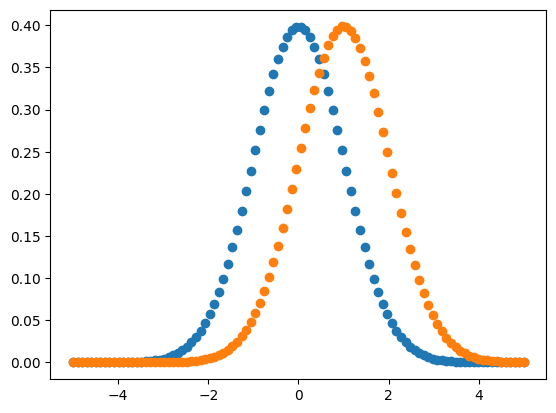

-0.050505050505050164 0.9595959595959593


In [7]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

x = np.linspace(-5, 5, 100)
f = stats.norm.pdf(x)
f_new = f*np.exp(x)
f_new = f_new/np.sum(f_new)*np.sum(f)

plt.scatter(x, f)
plt.scatter(x, f_new)
plt.show()
print(x[np.argmax(f)], x[np.argmax(f_new)])

In [7]:
import torch
from torch import optim
import timm
model = timm.create_model("tf_efficientnet_b0")
a = optim.Adam(model.parameters())


In [8]:
torch.ones(10, device=a.param_groups[0]['params'][0].device)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
import torch
from torch import tensor

In [23]:
torch.exp(tensor(50))

tensor(5.1847e+21)

In [36]:
configs = {
    "inner_optimizer": [
        {"name": "Adam"},
        {"name": "SGD", "lr": 1},
    ],
    "learning_rates": [
        [0.1, 0.01, 0.001, 0.0001],
        [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    ],
    "alpha": [1, 0.1, 0.01],
    "cumulative_loss_decay": [1, 0.994],
}

In [37]:
import itertools
import yaml
import copy

res = []
for o, l, a, w in itertools.product(configs["inner_optimizer"], configs["learning_rates"], configs["alpha"], configs["cumulative_loss_decay"]):
    d = {"optimizer": {
        "name": "ExpertsNonLinearizedStationary",
        "inner_optimizer": copy.deepcopy(o),
        "learning_rates": copy.deepcopy(l),
        "alpha": a,
        "cumulative_loss_decay": w
    }}
    res.append(d)
print(yaml.dump(res))

- optimizer:
    alpha: 1
    cumulative_loss_decay: 1
    inner_optimizer:
      name: Adam
    learning_rates:
    - 0.1
    - 0.01
    - 0.001
    - 0.0001
    name: ExpertsNonLinearizedStationary
- optimizer:
    alpha: 1
    cumulative_loss_decay: 0.994
    inner_optimizer:
      name: Adam
    learning_rates:
    - 0.1
    - 0.01
    - 0.001
    - 0.0001
    name: ExpertsNonLinearizedStationary
- optimizer:
    alpha: 0.1
    cumulative_loss_decay: 1
    inner_optimizer:
      name: Adam
    learning_rates:
    - 0.1
    - 0.01
    - 0.001
    - 0.0001
    name: ExpertsNonLinearizedStationary
- optimizer:
    alpha: 0.1
    cumulative_loss_decay: 0.994
    inner_optimizer:
      name: Adam
    learning_rates:
    - 0.1
    - 0.01
    - 0.001
    - 0.0001
    name: ExpertsNonLinearizedStationary
- optimizer:
    alpha: 0.01
    cumulative_loss_decay: 1
    inner_optimizer:
      name: Adam
    learning_rates:
    - 0.1
    - 0.01
    - 0.001
    - 0.0001
    name: ExpertsNonLinear

In [32]:
help(yaml.dump)

Help on function dump in module yaml:

dump(data, stream=None, Dumper=<class 'yaml.dumper.Dumper'>, **kwds)
    Serialize a Python object into a YAML stream.
    If stream is None, return the produced string instead.



In [39]:
from autoopt.models.small import SmallResnet20
from torchsummary import summary

In [41]:
summary(SmallResnet20(10), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,320
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]           2,320
       BatchNorm2d-8           [-1, 16, 32, 32]              32
              ReLU-9           [-1, 16, 32, 32]               0
    ResidualBlock-10           [-1, 16, 32, 32]               0
           Conv2d-11           [-1, 16, 32, 32]           2,320
      BatchNorm2d-12           [-1, 16, 32, 32]              32
             ReLU-13           [-1, 16, 32, 32]               0
           Conv2d-14           [-1, 16,

In [48]:
import torch
import numpy as np
from scipy import stats

torch.exp(torch.linspace(np.log(1e-4), np.log(1e-1), 4, device=torch.device('cpu')))

tensor([1.0000e-04, 1.0000e-03, 1.0000e-02, 1.0000e-01])

In [61]:
lr_min = 1e-4
lr_max = 1e-1
num_experts = 100

learning_rates = torch.exp(
    torch.linspace(np.log(lr_min), np.log(lr_max), num_experts)
)

x = np.linspace(-3, 3, num_experts)
probabilities = torch.tensor(stats.norm.pdf(x))
probabilities = probabilities/torch.sum(probabilities)
torch.sum(learning_rates*probabilities)

tensor(0.0060, dtype=torch.float64)

In [58]:
probabilities

tensor([0.0044, 0.0053, 0.0063, 0.0075, 0.0089, 0.0105, 0.0123, 0.0145, 0.0169,
        0.0196, 0.0227, 0.0262, 0.0301, 0.0345, 0.0394, 0.0448, 0.0508, 0.0573,
        0.0645, 0.0723, 0.0807, 0.0898, 0.0995, 0.1098, 0.1209, 0.1325, 0.1447,
        0.1574, 0.1707, 0.1844, 0.1984, 0.2128, 0.2273, 0.2420, 0.2566, 0.2712,
        0.2855, 0.2994, 0.3129, 0.3258, 0.3380, 0.3494, 0.3598, 0.3692, 0.3774,
        0.3844, 0.3901, 0.3944, 0.3973, 0.3988, 0.3988, 0.3973, 0.3944, 0.3901,
        0.3844, 0.3774, 0.3692, 0.3598, 0.3494, 0.3380, 0.3258, 0.3129, 0.2994,
        0.2855, 0.2712, 0.2566, 0.2420, 0.2273, 0.2128, 0.1984, 0.1844, 0.1707,
        0.1574, 0.1447, 0.1325, 0.1209, 0.1098, 0.0995, 0.0898, 0.0807, 0.0723,
        0.0645, 0.0573, 0.0508, 0.0448, 0.0394, 0.0345, 0.0301, 0.0262, 0.0227,
        0.0196, 0.0169, 0.0145, 0.0123, 0.0105, 0.0089, 0.0075, 0.0063, 0.0053,
        0.0044], dtype=torch.float64)

In [63]:
10**(-2.25)

0.005623413251903491

In [34]:
from autoopt.models.small import SmallResnet20

In [37]:
for i in range(4):
    torch.manual_seed(13)
    model = SmallResnet20(10)
    p = next(model.parameters())
    print(p.data[0])

tensor([[[-0.1571, -0.0079,  0.1195],
         [-0.1866, -0.1866,  0.0399],
         [-0.1032,  0.1398,  0.1870]],

        [[-0.1164, -0.1605, -0.0287],
         [ 0.1597, -0.0077,  0.0134],
         [-0.0887, -0.0951, -0.0620]],

        [[ 0.1296, -0.1428,  0.1807],
         [-0.0194, -0.0373,  0.1233],
         [ 0.1844, -0.0663, -0.0356]]])
tensor([[[-0.1571, -0.0079,  0.1195],
         [-0.1866, -0.1866,  0.0399],
         [-0.1032,  0.1398,  0.1870]],

        [[-0.1164, -0.1605, -0.0287],
         [ 0.1597, -0.0077,  0.0134],
         [-0.0887, -0.0951, -0.0620]],

        [[ 0.1296, -0.1428,  0.1807],
         [-0.0194, -0.0373,  0.1233],
         [ 0.1844, -0.0663, -0.0356]]])
tensor([[[-0.1571, -0.0079,  0.1195],
         [-0.1866, -0.1866,  0.0399],
         [-0.1032,  0.1398,  0.1870]],

        [[-0.1164, -0.1605, -0.0287],
         [ 0.1597, -0.0077,  0.0134],
         [-0.0887, -0.0951, -0.0620]],

        [[ 0.1296, -0.1428,  0.1807],
         [-0.0194, -0.0373,  0.123

In [37]:
import torch
from torch.utils.data import DataLoader, Dataset, SequentialSampler, RandomSampler

In [19]:
class DummyDataset(Dataset):
    def __init__(self, n):
#         super(DummyDataset, self).__init__()
        self.n = n
    
    def __len__(self):
        return self.n
    
    def __getitem__(self, i):
        return torch.tensor(i), torch.tensor(i)

In [20]:
dataset = DummyDataset(10000)

In [69]:
torch.manual_seed(13)
generator = torch.Generator()
generator.manual_seed(2147483647)
dataloader = DataLoader(dataset, batch_size=10, sampler=RandomSampler(dataset, generator=generator))

In [70]:
for i, (x, y) in enumerate(dataloader):
    print(x)
#     a = torch.randn(10)
    if i == 5:
        break

tensor([2031, 1548, 5331,  246, 4461, 2550, 3478, 8270, 7927, 6722])
tensor([2271, 5902, 4004,  176, 5281, 8729, 1072, 1938, 8274, 3496])
tensor([5593, 5630, 2458, 9273, 4827, 7256, 9260, 5420, 6954, 3585])
tensor([3747, 5850, 1906, 1714, 3061, 8400, 2268, 4244, 8718,  382])
tensor([5045, 3109, 4619, 7908, 1094, 7420, 8943, 3576,  556, 1016])
tensor([1010, 1364,  540, 5296, 2338,  395, 1124, 2965, 7995, 1349])


## Profiles

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
# path = "results/ResNet34_CIFAR10_noaugment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json"
# path = "results/ResNet34_CIFAR10_augment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json"
path = "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/profiles_0.json"
with open(path) as file:
    obj = json.load(file)
# path = path.replace("_prof_", "_prof_long_")
# with open(path) as file:
#     obj_long = json.load(file)
# for key in obj.keys():
#     obj[key].extend(obj_long[key])
# #     print(key, len(obj[key]))
# obj.keys()

In [4]:
for key in obj.keys():
    if key in ['optimizer_epoch_directions', 'optimizer_step_directions']:
        continue
    if 'optimizer' in key:
        print(key, np.mean(np.array(obj[key][1:])[0,:,0]))
    else:
        print(key, np.mean(np.array(obj[key])[1,:,0]))

32_gradient_real/train 1.4381819367408752
32_gradient_approx/train 1.4381540536880493


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

0
0.015848931924611127
0.012589254117941666
0.003162277660168379
0.00630957344480193
0.00251188643150958
0.00251188643150958
0.015848931924611127
0.009999999999999995
0.015848931924611127
0.015848931924611127
1
0.009999999999999995
0.007943282347242812
0.007943282347242812
0.007943282347242812
0.009999999999999995
0.007943282347242812
0.007943282347242812
0.00630957344480193
0.009999999999999995
0.007943282347242812
2
0.012589254117941666
0.009999999999999995
0.012589254117941666
0.012589254117941666
0.007943282347242812
0.007943282347242812
0.007943282347242812
0.007943282347242812
0.015848931924611127
0.00630957344480193
3
0.015848931924611127
0.012589254117941666
0.015848931924611127
0.019952623149688785
0.009999999999999995
0.015848931924611127
0.015848931924611127
0.019952623149688785
0.015848931924611127
0.015848931924611127
4
0.0316227766016838
0.025118864315095784
0.019952623149688785
0.019952623149688785
0.0316227766016838
0.0316227766016838
0.025118864315095784
0.019952623149

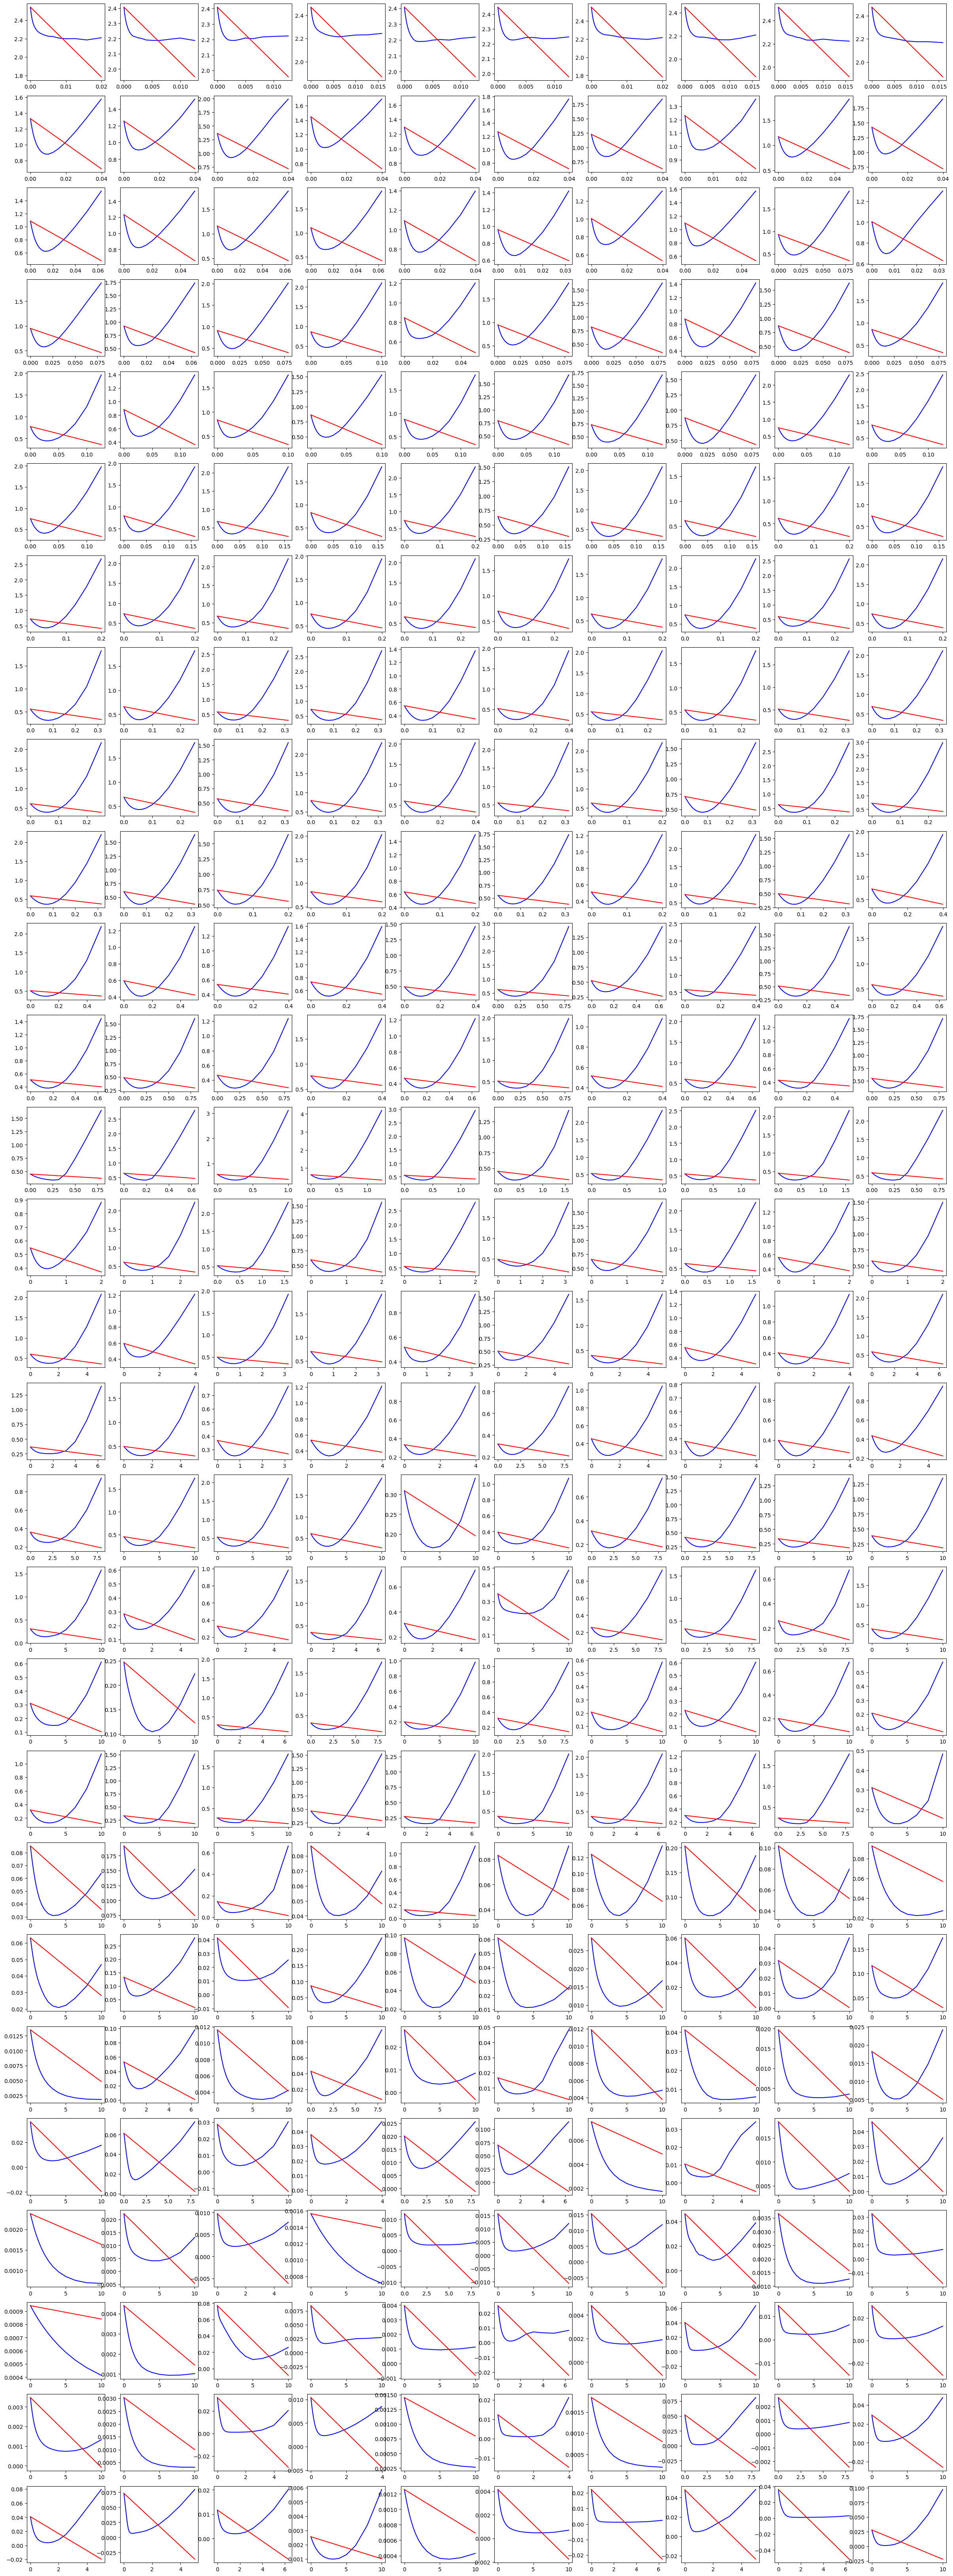

In [5]:
BATCH_SIZE = 128
DIRECTION = 'gradient' # 'gradient', 'optimizer', 'random'
PHASE = 'train' # 'train', val'
C = 0.1
lr_min: float = 1e-5
lr_max: float = 10
n_steps = 61
# prefix = 30
lrs = np.exp(np.linspace(np.log(lr_min), np.log(lr_max), n_steps))
np.array(obj['128_optimizer_real/train']).shape
epochs = list(range(28))
samples = list(range(10))
# epochs = [1, 2, 9, 19, 20, 21, 22, 23, 24, 25, 26, 27]
# samples = [0, 1, 2]
fig, axs = plt.subplots(len(epochs), len(samples), figsize=(3*len(samples), 3*len(epochs)))
for i, epoch in enumerate(epochs):
    print(epoch)
    for j, sample in enumerate(samples):
        real = obj[f'{BATCH_SIZE}_{DIRECTION}_real/{PHASE}'][epoch][sample]
        approx = obj[f'{BATCH_SIZE}_{DIRECTION}_approx/{PHASE}'][epoch][sample]
        real = np.array(real)
        approx = np.array(approx)
        approx = approx[0] + C*(approx-approx[0])
        try:
            idx = np.max(np.where(approx > real)) + 5
        except:
            idx = real.shape[0]
#         print(idx)
        axs[i, j].plot(lrs[:idx], real[:idx], color='blue')
        axs[i, j].plot(lrs[:idx], approx[:idx], color='red')
#         axs[i, j].set_xscale('log')
#         axs[i, j].set_yscale('log')
#         axs[i, j].set_xlim(lr_min, 1e-1)
#         axs[i, j].set_ylim(1, 4)
        print(lrs[np.argmin(real)])
plt.savefig('paper/figures/profiles/total_optimizer.pdf')
plt.show()
plt.clf()

In [7]:
obj.keys()

dict_keys(['32_gradient_real/train', '32_gradient_approx/train', '32_gradient_length/train', '32_optimizer_real/train', '32_optimizer_approx/train', '32_optimizer_length/train', '32_random_real/train', '32_random_approx/train', '32_random_length/train', '32_gradient_real/val', '32_gradient_approx/val', '32_gradient_length/val', '32_optimizer_real/val', '32_optimizer_approx/val', '32_optimizer_length/val', '32_random_real/val', '32_random_approx/val', '32_random_length/val', '64_gradient_real/train', '64_gradient_approx/train', '64_gradient_length/train', '64_optimizer_real/train', '64_optimizer_approx/train', '64_optimizer_length/train', '64_random_real/train', '64_random_approx/train', '64_random_length/train', '64_gradient_real/val', '64_gradient_approx/val', '64_gradient_length/val', '64_optimizer_real/val', '64_optimizer_approx/val', '64_optimizer_length/val', '64_random_real/val', '64_random_approx/val', '64_random_length/val', '128_gradient_real/train', '128_gradient_approx/train

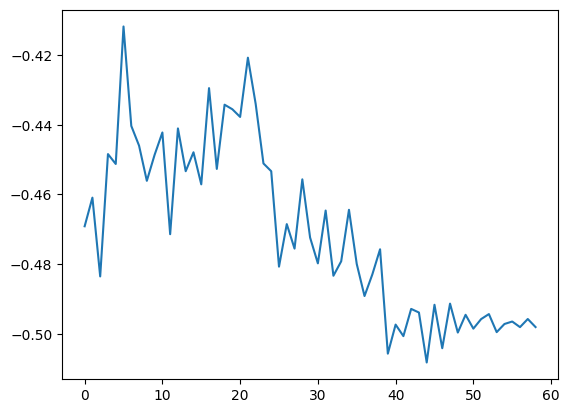

In [8]:
direction_changes = obj['optimizer_step_directions']
cumsum = np.cumsum(direction_changes)
N = 20
running_mean = (cumsum[N:]-cumsum[:-N])/N
n = len(running_mean)
plt.plot(np.arange(n), running_mean)
plt.show()

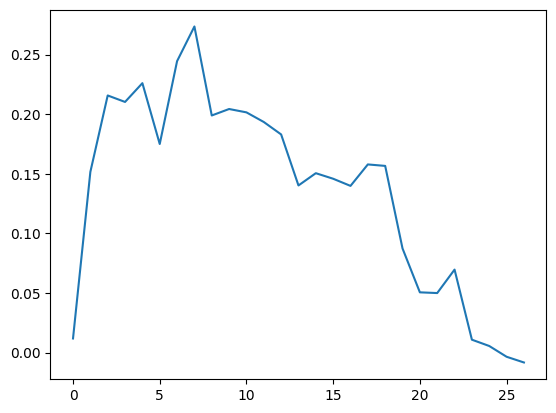

In [10]:
plt.plot(np.arange(27), obj['optimizer_epoch_directions'])
plt.show()

<Figure size 640x480 with 0 Axes>

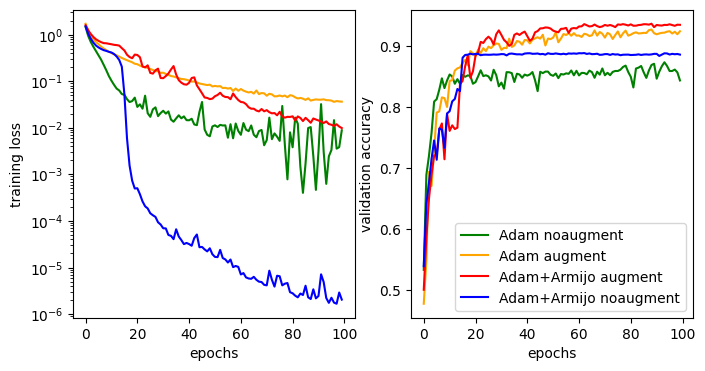

In [33]:
import json
def train_loss_val_acc_plot(ax, path, color, label):
    with open(path) as file:
        obj = json.load(file)
    
    n = len(obj['loss/train'])
    ax[0].plot(np.arange(n), obj['loss/train'][:n], color=color, label=label)
    n = len(obj['acc/val'])
    ax[1].plot(np.arange(n), obj['acc/val'][:n], color=color, label=label)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
train_loss_val_acc_plot(axs, "results/ResNet34_CIFAR10_noaugment_OptimizerWrapper_Adam_0.001_prof_long_0/stats.json", color='green', label='Adam noaugment')
train_loss_val_acc_plot(axs, "results/ResNet34_CIFAR10_augment_OptimizerWrapper_Adam_0.001_prof_long_0/stats.json", color='orange', label='Adam augment')
train_loss_val_acc_plot(axs, "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/stats.json", color='red', label='Adam+Armijo augment')
train_loss_val_acc_plot(axs, "results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/stats.json", color='blue', label='Adam+Armijo noaugment')

axs[0].set_ylabel('training loss')
axs[1].set_ylabel('validation accuracy')
axs[0].set_xlabel('epochs')
axs[1].set_xlabel('epochs')
axs[0].set_yscale('log')
plt.legend()
plt.savefig('paper/figures/profiles/acc.pdf')
plt.show()
plt.clf()

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt
# path = "results/ResNet34_CIFAR10_noaugment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json"
path = "results/ResNet34_CIFAR10_augment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json"
path = "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/profiles_0.json"
with open(path) as file:
    obj = json.load(file)
# path = path.replace("_prof_", "_prof_long_")
# with open(path) as file:
#     obj_long = json.load(file)
# for key in obj.keys():
#     obj[key].extend(obj_long[key])
#     print(key, len(obj[key]))

In [18]:
import itertools
from tqdm import tqdm

BATCH_SIZES = [32, 64, 128, 256]
DIRECTIONS = ['gradient', 'optimizer']#, 'random']
PHASES = ['train', 'val']
lr_min: float = 1e-5
lr_max: float = 10
n_steps = 61
lrs = np.exp(np.linspace(np.log(lr_min), np.log(lr_max), n_steps))
epochs = list(range(0, 28, 1))
epochs_mapping = list(range(0, 20, 1)) + list(range(29, 100, 10))
samples = list(range(10))
# epochs = list(range(0, 4))
# epochs = [1, 2, 9, 24]
# samples = [0, 1, 2]
# fig, axs = plt.subplots(len(epochs), len(samples), figsize=(3*len(samples), 3*len(epochs)))

least_convex_local = {}
most_convex_local = {}
least_convex_global = {}
most_convex_global = {}

def get_convexity_stats(obj, BATCH_SIZE, DIRECTION, PHASE):
    convex_arr = []
    convex_total_arr = []
    
    for i, epoch in enumerate(epochs):
        for j, sample in enumerate(samples):
            real = obj[f'{BATCH_SIZE}_{DIRECTION}_real/{PHASE}'][epoch][sample]
            real = np.array(real)
            convex_condition = (lrs[1:-1] - lrs[:-2]) * real[2:] + (lrs[2:] - lrs[1:-1]) * real[:-2] - (lrs[2:] - lrs[:-2]) * real[1:-1]
            convex = np.mean(convex_condition + np.abs(convex_condition)/100 >= 0)
            convex_total = 0
            total = 0
            for a in range(len(real)):
                for b in range(a+1, len(real)):
                    for c in range(b+1, len(real)):
                        convex_total += (((lrs[b]-lrs[a]) * real[c] + (lrs[c]-lrs[b]) * real[a] - (lrs[c]-lrs[a]) * real[b]) > 0)
                        total+=1
            convex_total/=total
            convex_arr.append(convex)
            convex_total_arr.append(convex_total)
            
            name = f'{DIRECTION}/{PHASE}'
            if name not in least_convex_local.keys() or least_convex_local[name][0] > convex:
                least_convex_local[name] = (convex, BATCH_SIZE, real)
            if name not in least_convex_global.keys() or least_convex_global[name][0] > convex_total:
                least_convex_global[name] = (convex_total, BATCH_SIZE, real)
            if name not in most_convex_local.keys() or most_convex_local[name][0] < convex:
                most_convex_local[name] = (convex, BATCH_SIZE, real)
            if name not in most_convex_global.keys() or most_convex_global[name][0] < convex_total:
                most_convex_global[name] = (convex_total, BATCH_SIZE, real)
                
            
    return (np.mean(convex_arr), np.std(convex_arr)/(len(convex_arr)-1)**0.5), \
            (np.mean(convex_total_arr), np.std(convex_total_arr)/(len(convex_total_arr)-1)**0.5)
#     return f"${np.mean(convex_arr):.2f} pm {np.std(convex_arr)/(len(convex_arr)-1)**0.5:.2f}$", \
#         f"${np.mean(convex_total_arr):.2f} pm {np.std(convex_total_arr)/(len(convex_total_arr)-1)**0.5:.2f}$"

res = {}
res_total = {}
for batch_size in BATCH_SIZES:
    for direction, phase in tqdm(itertools.product(DIRECTIONS, PHASES)):
        name = f"{batch_size}-{direction}-{phase}"
        res[name], res_total[name] = get_convexity_stats(obj, batch_size, direction, phase)

4it [02:58, 44.60s/it]
4it [02:59, 44.90s/it]
4it [03:06, 46.63s/it]
4it [03:04, 46.01s/it]


In [19]:
import pandas as pd
def to_latex(res):
    arr = []
    for batch_size in BATCH_SIZES:
        arr.append([])
        for direction, phase in itertools.product(DIRECTIONS, PHASES):
            name = f"{batch_size}-{direction}-{phase}"
#             arr[-1].append(f"${res[name][0]:.2f} pm {3*res[name][1]:.3f}$")
            arr[-1].append(f"${res[name][0]:.2f}$")
    df = pd.DataFrame(arr, columns=["-".join(x) for x in itertools.product(DIRECTIONS, PHASES)], index=BATCH_SIZES)
    return df.to_latex(escape=False)
print(to_latex(res))
print("******************")
print(to_latex(res_total))

\begin{tabular}{lllll}
\toprule
{} & gradient-train & gradient-val & optimizer-train & optimizer-val \\
\midrule
32  &         $0.77$ &       $0.78$ &          $0.85$ &        $0.84$ \\
64  &         $0.77$ &       $0.77$ &          $0.85$ &        $0.85$ \\
128 &         $0.76$ &       $0.77$ &          $0.84$ &        $0.84$ \\
256 &         $0.75$ &       $0.76$ &          $0.83$ &        $0.83$ \\
\bottomrule
\end{tabular}

******************
\begin{tabular}{lllll}
\toprule
{} & gradient-train & gradient-val & optimizer-train & optimizer-val \\
\midrule
32  &         $0.92$ &       $0.92$ &          $0.87$ &        $0.87$ \\
64  &         $0.92$ &       $0.93$ &          $0.87$ &        $0.88$ \\
128 &         $0.92$ &       $0.93$ &          $0.86$ &        $0.86$ \\
256 &         $0.91$ &       $0.93$ &          $0.85$ &        $0.86$ \\
\bottomrule
\end{tabular}



In [202]:
import pickle

def pickle_dump(obj, path):
    with open(path, "wb") as file:
        pickle.dump(obj, file)
# pickle_dump((least_convex_local, least_convex_global, most_convex_local, most_convex_global), "paper/data/convex_profiles_augment.pickle")
# pickle_dump((least_convex_local, least_convex_global, most_convex_local, most_convex_global), "paper/data/convex_profiles_noaugment.pickle")
pickle_dump((least_convex_local, least_convex_global, most_convex_local, most_convex_global), "paper/data/convex_profiles_armijo_augment.pickle")

In [252]:
import pickle
def pickle_load(path):
    with open(path, "rb") as file:
        return pickle.load(file)
least_convex_local, least_convex_global, most_convex_local, most_convex_global = pickle_load("paper/data/convex_profiles_augment.pickle")
# least_convex_local, least_convex_global, most_convex_local, most_convex_global = pickle_load("paper/data/convex_profiles_noaugment.pickle")

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

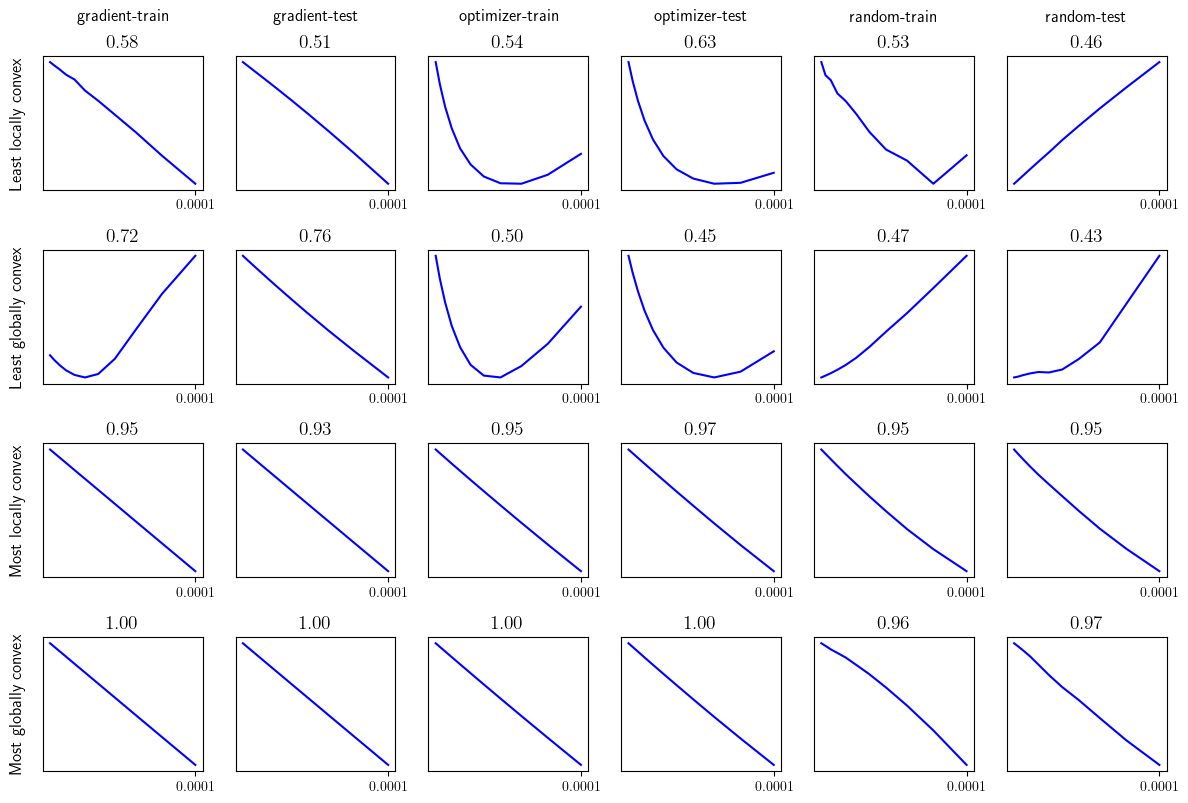

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

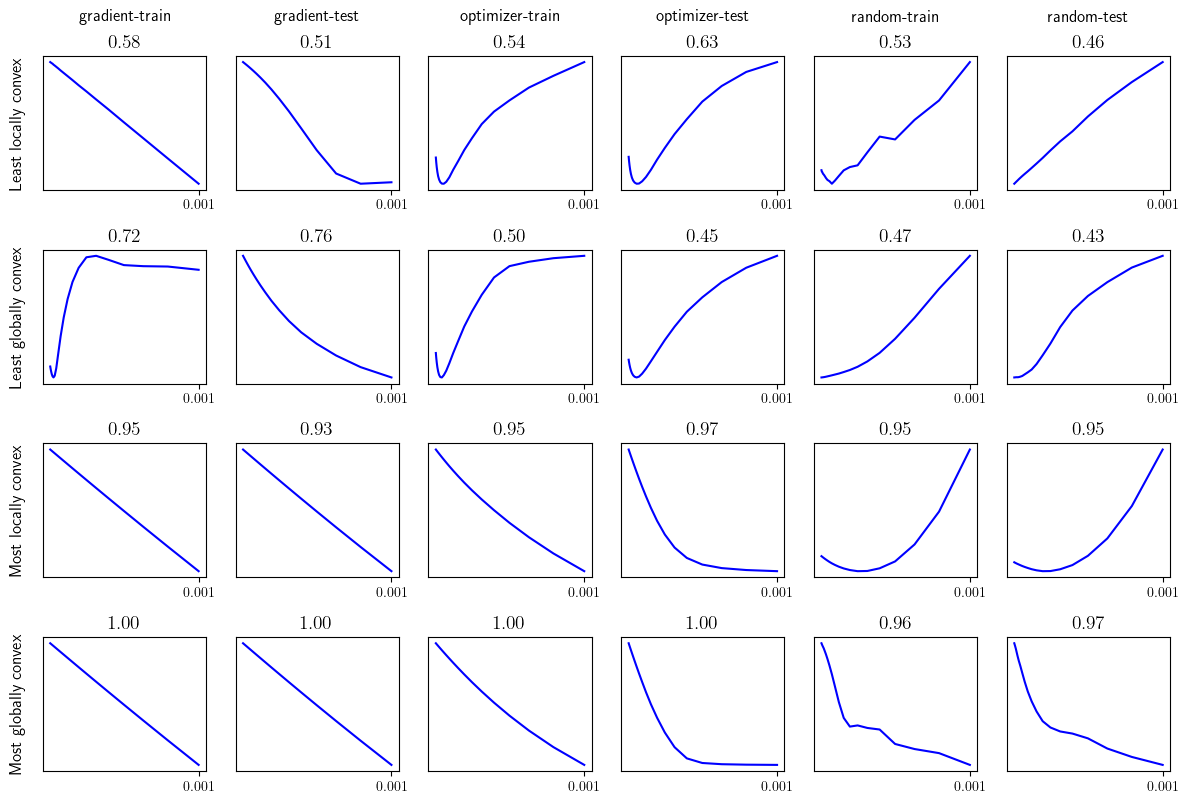

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

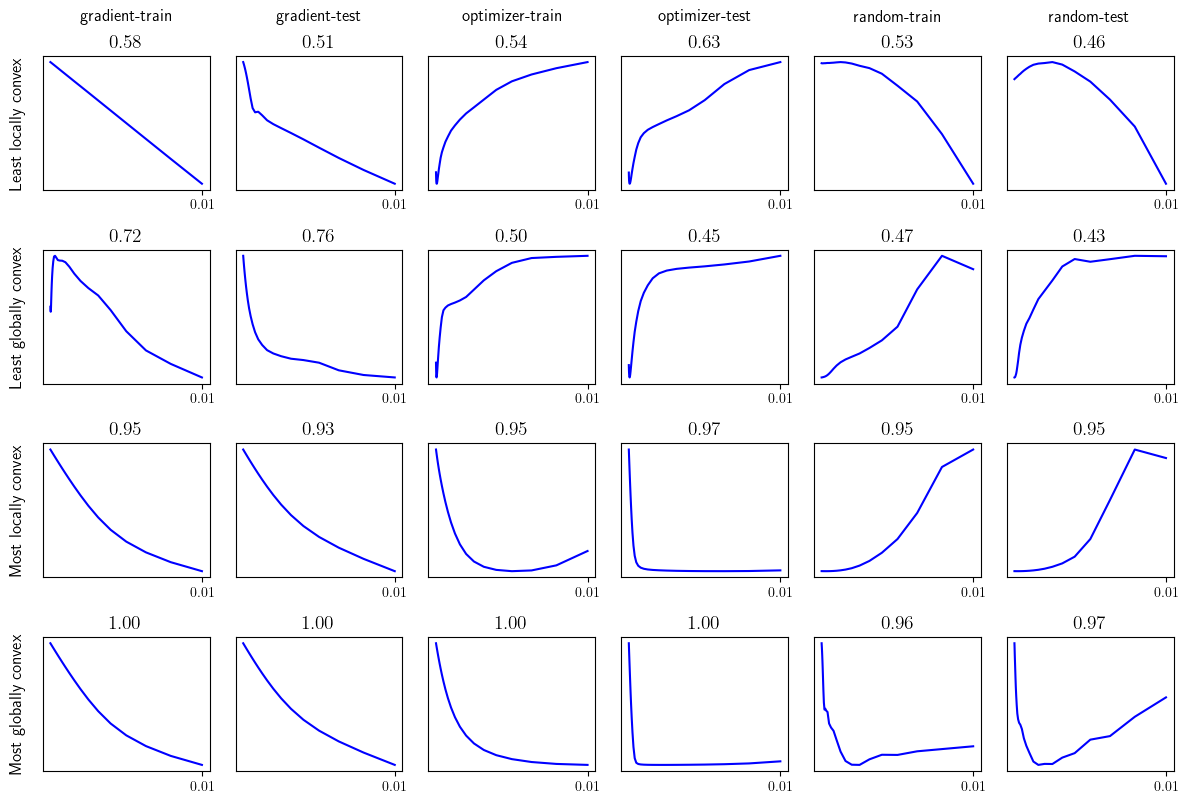

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

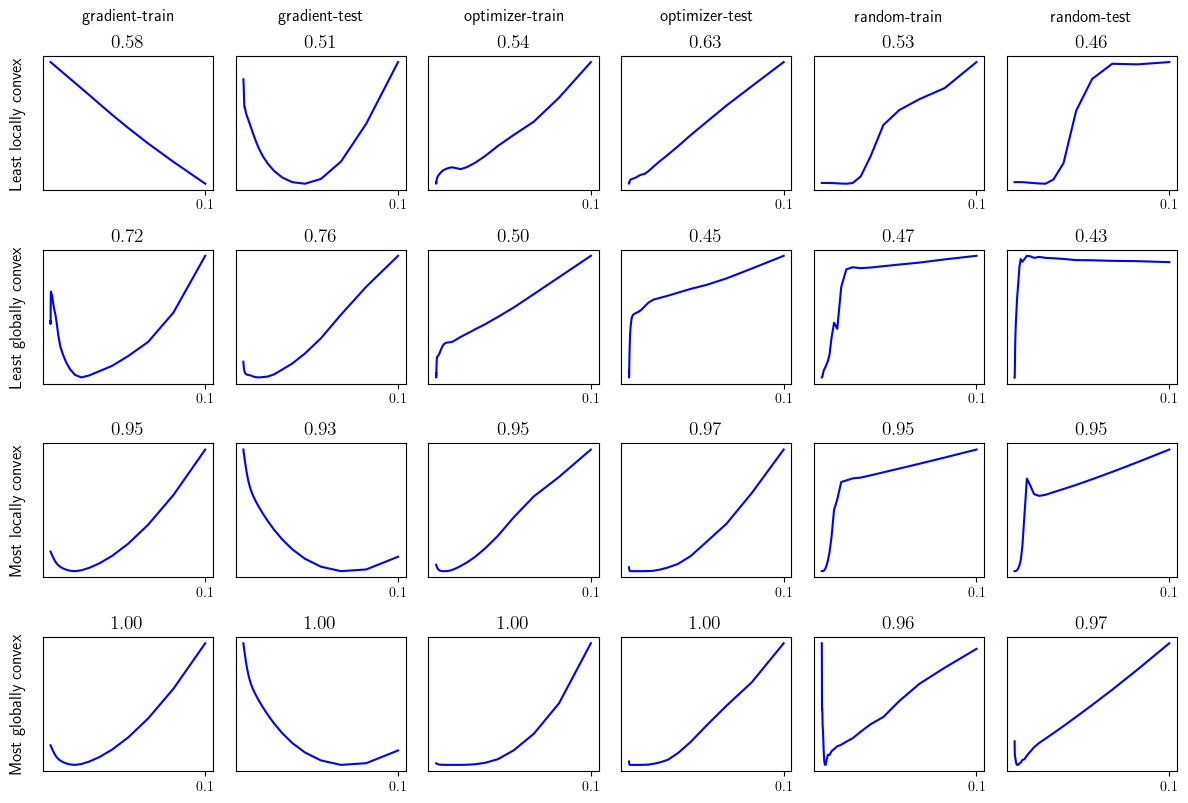

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

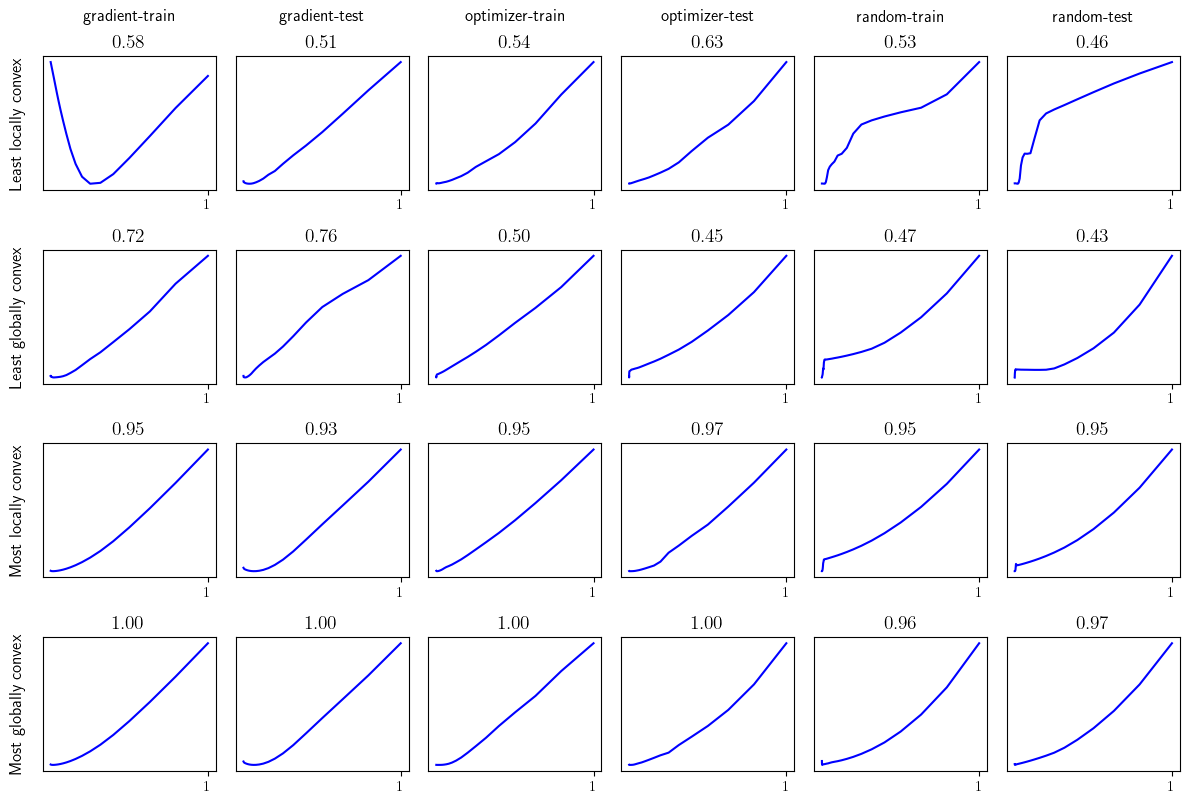

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

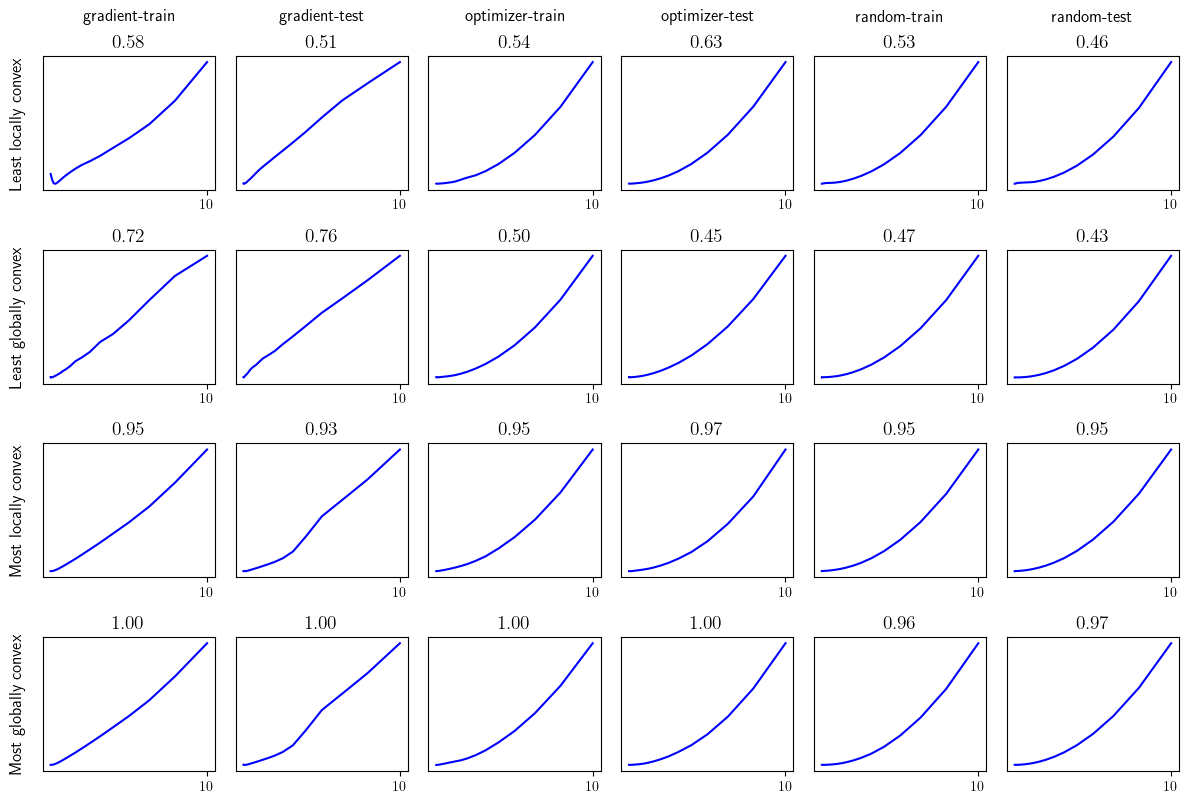

[49, 41, 13, 13, 37, 38]
[38, 35, 12, 13, 5, 5]
[37, 43, 32, 33, 19, 18]
[37, 43, 35, 28, 29, 27]


<Figure size 640x480 with 0 Axes>

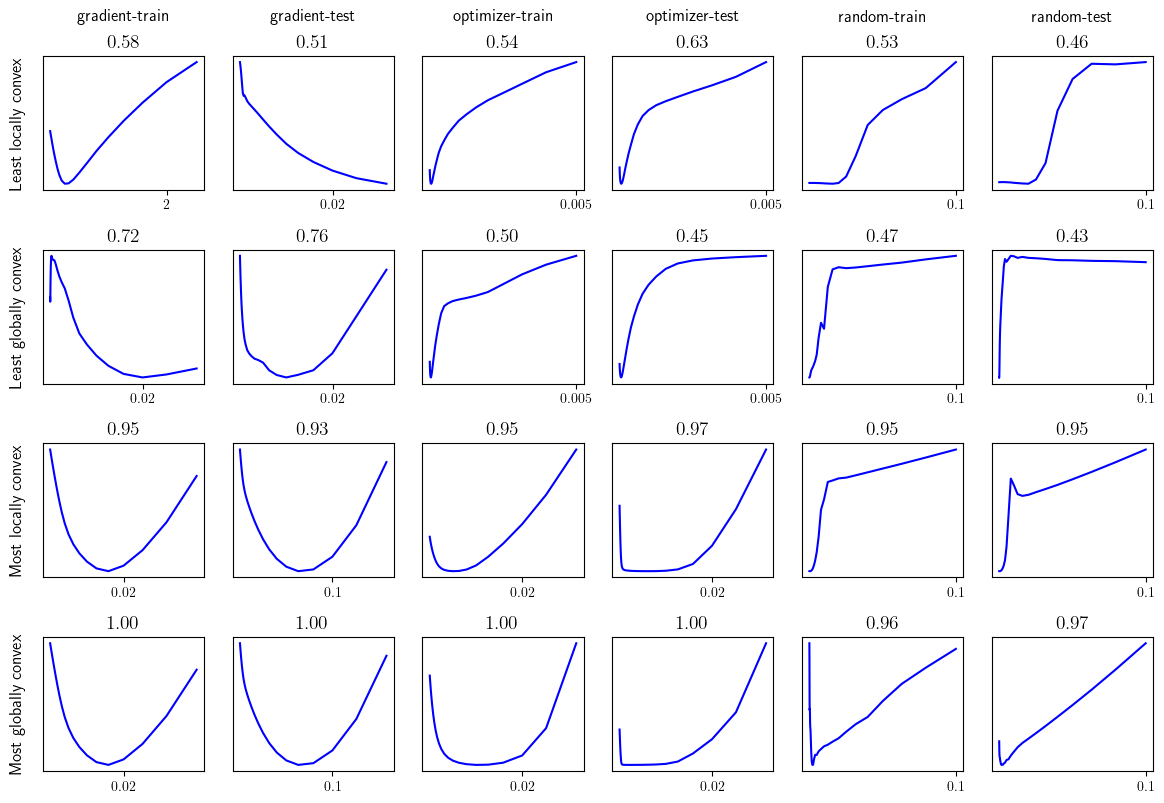

In [257]:
import matplotlib
matplotlib.rc('text', usetex = True)

AUGMENT = True

def draw_profiles(ax, line, data, directions, thresholds):
    ns = []
    for i, direction in enumerate(directions):
        convexity, batch_size, real = data[direction]
        n = np.argmin(real)+5
        ns.append(n)
        n = thresholds[line][i]
        real = real[:n]
        local_lrs = lrs[:n]
#         line_y = ((lrs[-1] - lrs)*real[0] + (lrs - lrs[0])*real[-1])/(lrs[-1]-lrs[0])
#         ax[line, i].plot(local_lrs, line_y)
        ax[line, i].plot(local_lrs, real, color='blue')
        ax[line, i].set_title(f'${convexity:.2f}$', fontsize=14)
#         ax[line, i].tick_params(axis='x', bottom=False, labelbottom=False, which='both')
#         ax[line, i].tick_params(axis='y', left=False, labelleft=False, which='both')
        ticks = np.array([1, 2, 5]*7) * 10**np.tile(np.arange(-5, 2, dtype=np.float).reshape(-1, 1), (1, 3)).flatten()
        tick = ticks[np.argmax(np.arange(ticks.size)[ticks <= 1.1*local_lrs[-1]])]
        ax[line, i].set_xticks([tick])
#         ax[line, i].set_xticks([])
        ax[line, i].set_yticks([])
    print(ns)
rows = ['Least locally convex', 'Least globally convex', 'Most locally convex', 'Most globally convex']
directions = ['gradient/train', 'gradient/val', 'optimizer/train', 'optimizer/val', 'random/train', 'random/val']
if not AUGMENT:
    directions = directions[:4]
    append_to_name = "_noaugment"
    figsize = (8, 8)
else:
    append_to_name = ""
    figsize = (12, 8)
cols = [direction.replace("/", "-") for direction in directions]

# plt.setp(axs.flat, xlabel='Epochs', ylabel='Loss')

i = -4
for threshold in range(11, 62, 10):
    thresholds = [[threshold]*len(directions)]*len(rows)
    draw_outer(thresholds, f'lr1e{i}{append_to_name}')
    i+=1

if AUGMENT:
    thresholds = [
        [55, 36, 28, 28, 41, 41],
        [36, 36, 28, 28, 41, 41],
        [37, 43, 36, 36, 41, 41],
        [37, 43, 36, 36, 41, 41]
    ]
else:
    thresholds = [
        [55, 36, 28, 28, 41, 41],
        [36, 36, 28, 28, 41, 41],
        [37, 43, 36, 36, 41, 41],
        [37, 43, 36, 36, 41, 41]
    ]

def draw_outer(thresholds, name):
    fig, axs = plt.subplots(4, len(directions), figsize=figsize)

    draw_profiles(axs, 0, least_convex_local, directions, thresholds)
    draw_profiles(axs, 1, least_convex_global, directions, thresholds)
    draw_profiles(axs, 2, most_convex_local, directions, thresholds)
    draw_profiles(axs, 3, most_convex_global, directions, thresholds)

    pad = 5
    for ax, col in zip(axs[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, 5*pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')

    for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center', rotation=90)

    plt.tight_layout()
    fig.subplots_adjust(left=0.06, top=0.94)
    plt.savefig(f'paper/figures/profiles/{name}.pdf')
    plt.show()
    plt.clf()

draw_outer(thresholds, 'final' + append_to_name)

In [230]:
def add_approx(data):
    for key in obj.keys():
        if key in ['optimizer_epoch_directions', 'optimizer_step_directions']:
            continue
        if 'real' not in key:
            continue
        for i, epoch in enumerate(obj[key]):
            for j, sample in enumerate(epoch):
                for entrytype in data.keys():
                    diff = np.sum((data[entrytype][2] - sample)**2)
                    approx = obj[key.replace("real", "approx")][i][j]
                    if len(data[entrytype]) == 3:
                        data[entrytype] = (*data[entrytype], diff, approx, key)
                    elif data[entrytype][3] > diff:
                        data[entrytype] = (*data[entrytype][:3], diff, approx, key)
add_approx(least_convex_local)
add_approx(least_convex_global)
add_approx(most_convex_local)
add_approx(most_convex_global)

<Figure size 640x480 with 0 Axes>

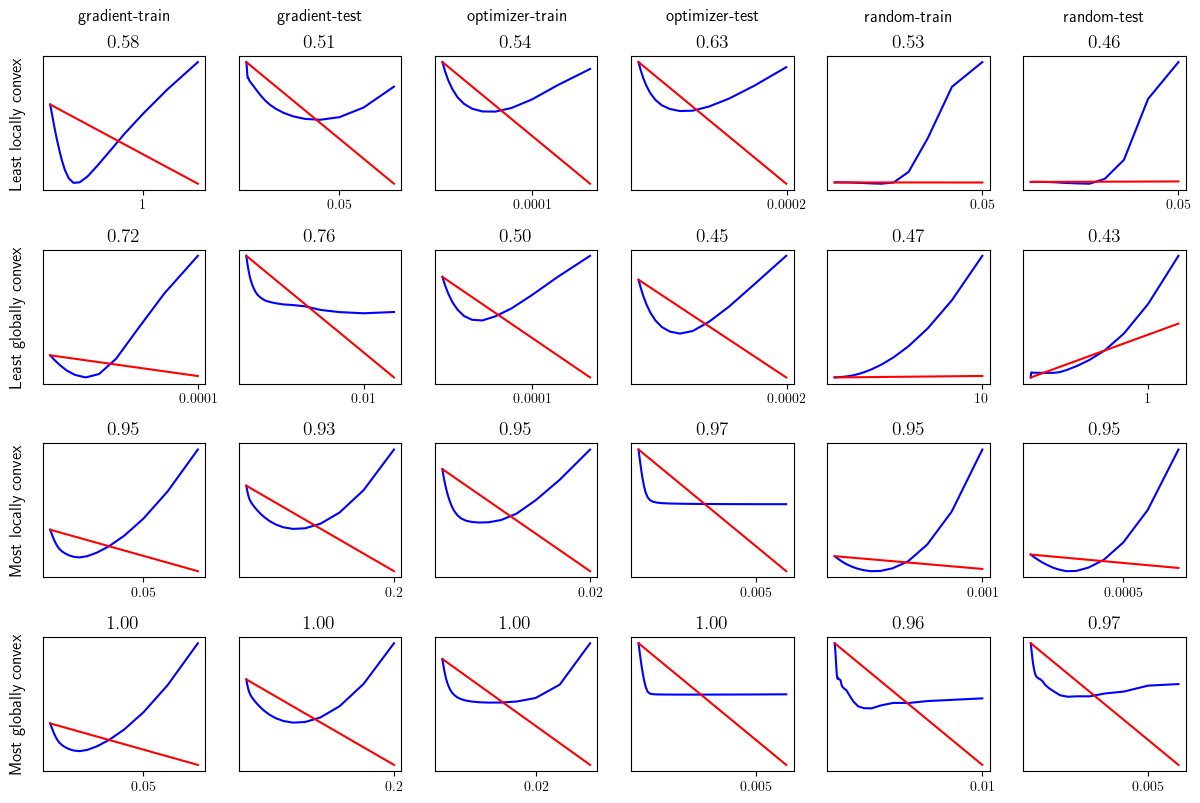

In [242]:
AUGMENT = True

def draw_profiles_with_armijo(ax, line, data, directions, thresholds):
    ns = []
    for i, direction in enumerate(directions):
        convexity, batch_size, real, _, approx, _ = data[direction]
        approx = np.array(approx)
        approx = real[0] + C*(approx-approx[0])
        try:
            n = np.max(np.where(approx > real)) + 5
        except:
            n = real.shape[0]
#         n = np.argmin(real)+5
#         ns.append(n)
#         n = thresholds[line][i]
        real = real[:n]
        approx = approx[:n]
        local_lrs = lrs[:n]
#         line_y = ((lrs[-1] - lrs)*real[0] + (lrs - lrs[0])*real[-1])/(lrs[-1]-lrs[0])
#         ax[line, i].plot(local_lrs, line_y)
        ax[line, i].plot(local_lrs, real, color='blue')
        ax[line, i].plot(local_lrs, approx, color='red')
        ax[line, i].set_title(f'${convexity:.2f}$', fontsize=14)
#         ax[line, i].tick_params(axis='x', bottom=False, labelbottom=False, which='both')
#         ax[line, i].tick_params(axis='y', left=False, labelleft=False, which='both')
        ticks = np.array([1, 2, 5]*7) * 10**np.tile(np.arange(-5, 2, dtype=np.float).reshape(-1, 1), (1, 3)).flatten()
        tick = ticks[np.argmax(np.arange(ticks.size)[ticks <= 1.1*local_lrs[-1]])]
        ax[line, i].set_xticks([tick])
        ax[line, i].set_yticks([])
        
rows = ['Least locally convex', 'Least globally convex', 'Most locally convex', 'Most globally convex']
directions = ['gradient/train', 'gradient/val', 'optimizer/train', 'optimizer/val', 'random/train', 'random/val']
if not AUGMENT:
    directions = directions[:4]
    append_to_name = "_noaugment"
    figsize = (8, 8)
else:
    append_to_name = ""
    figsize = (12, 8)
cols = [direction.replace("/", "-") for direction in directions]

fig, axs = plt.subplots(4, len(directions), figsize=figsize)

draw_profiles_with_armijo(axs, 0, least_convex_local, directions, thresholds)
draw_profiles_with_armijo(axs, 1, least_convex_global, directions, thresholds)
draw_profiles_with_armijo(axs, 2, most_convex_local, directions, thresholds)
draw_profiles_with_armijo(axs, 3, most_convex_global, directions, thresholds)

pad = 5
for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 5*pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.tight_layout()
fig.subplots_adjust(left=0.03, top=0.94)
plt.savefig(f'paper/figures/profiles/final_armijo.pdf')
plt.show()
plt.clf()

4it [00:00, 58.05it/s]


32 gradient train [-1.24259125e+03 -2.63238880e+01 -4.10772761e+01 -2.11797622e+01
 -1.72940062e+01 -1.38616165e+01 -1.83541444e+01 -1.01255882e+01
 -7.96911617e+00 -5.87868939e+00 -8.68366493e+00 -7.82851916e+00
 -5.21981426e+00 -9.80563710e+00 -2.74306950e+00 -4.80657133e+00
 -6.11386283e+00 -3.65857369e+00 -3.45923317e+00 -4.34042663e+00
 -1.92722700e+00 -1.74062946e+00 -5.78637626e-01 -7.52656552e-02
 -4.23081137e-01 -2.73652402e+02 -3.08434347e+00 -2.41568930e-01]
32 gradient train [-1.34523677e+03 -2.99157037e+01 -2.00401147e+01 -7.76102079e+01
 -1.73377428e+01 -1.38141182e+01 -1.23695433e+01 -1.05407106e+01
 -1.32829580e+01 -8.55852167e+00 -7.85945025e+00 -9.27496950e+00
 -4.49122323e+00 -8.04512037e+00 -5.25390026e+00 -5.85755706e+00
 -4.88003509e+00 -5.22068226e+00 -4.86000048e+00 -5.54953184e+00
 -2.06685770e+00 -3.23631946e+00 -7.19159014e-01 -1.12425370e+00
 -1.89629042e+00 -6.26724731e-01 -3.01460942e-01 -6.35114979e-01]
32 gradient train [-1.47717477e+03 -6.26524919e+02 -

4it [00:00, 53.24it/s]


64 gradient train [-6.34520014e+02 -1.18662781e+01 -2.06674139e+01 -1.24916169e+01
 -6.96873334e+00 -5.95759352e+00 -5.80796931e+00 -3.56541243e+00
 -2.51336396e+00 -2.10202775e+00 -2.86631990e+00 -2.32317671e+00
 -1.37535907e+00 -2.27371272e+00 -1.59723865e+00 -1.44087171e+00
 -1.82561980e+00 -1.11752438e+00 -1.66503888e+00 -6.56107544e-01
 -2.33788671e-01 -7.10402796e-01 -2.42745517e-01 -3.26074563e-01
 -9.32345550e-02 -2.79274092e-04 -3.11620665e-03 -1.18231165e-01]
64 gradient train [-6.43958039e+02 -1.71589719e+01 -1.08482771e+01 -9.39644708e+00
 -6.76818689e+00 -5.67736891e+00 -4.96266948e+00 -4.37754393e+00
 -3.64157226e+00 -3.31077642e+00 -2.90529761e+00 -3.91206145e+00
 -2.37044361e+00 -3.30721007e+00 -2.18847725e+00 -2.32648353e+00
 -2.35523449e+00 -2.29267279e+00 -1.84020483e+00 -2.19106012e+00
 -1.13510133e+00 -1.58893565e+00 -6.77528895e-01 -6.75287615e-01
 -4.94925176e-01 -3.69860480e-01 -1.18028896e-01 -3.80280247e-01]
64 gradient train [-7.23041428e+02 -3.38347693e+02 -

0it [00:00, ?it/s]

128 gradient train [-3.40893401e+02 -7.31013881e+00 -1.24196741e+01 -6.76565038e+00
 -3.50128611e+00 -3.74712878e+00 -2.71641546e+00 -1.74405177e+00
 -1.31896469e+00 -1.10556268e+00 -2.26225042e+00 -1.10997446e+00
 -6.04982902e-01 -8.37424563e-01 -5.75530964e-01 -8.82531413e-01
 -8.21506191e-01 -4.94897986e-01 -7.02535113e-01 -2.96087211e-01
 -1.29547643e-01 -1.65344358e-01 -8.56535925e-02 -1.17357665e-01
 -2.42380160e-02 -3.36090630e-05 -5.39176755e-04 -4.92271752e-02]
128 gradient train [-3.44169352e+02 -1.09904210e+01 -5.52021133e+00 -5.82993031e+00
 -4.53949637e+00 -2.24705537e+00 -2.85053253e+00 -2.16124786e+00
 -2.52602498e+00 -1.47853957e+00 -1.58202648e+00 -2.04959512e+00
 -1.31991837e+00 -1.88235773e+00 -1.14465588e+00 -1.12588372e+00
 -1.06070770e+00 -1.28432777e+00 -8.42207008e-01 -1.01356539e+00
 -5.59117231e-01 -4.26074697e-01 -3.27546563e-01 -1.63051610e-01
 -1.39759957e-01 -1.07372749e-01 -1.51259307e-01 -1.67449522e-01]
128 gradient train [-3.72426033e+02 -1.54377871e+0

4it [00:00, 47.63it/s]


128 optimizer train [-3.44794279e+04 -2.12494971e+03 -1.48471868e+03 -1.03435494e+03
 -7.84555369e+02 -5.05982495e+02 -3.30276459e+02 -2.16091182e+02
 -1.92271050e+02 -1.36777325e+02 -9.06286405e+01 -5.80558711e+01
 -4.06953295e+01 -3.13922366e+01 -1.84477733e+01 -1.45505832e+01
 -1.41267644e+01 -1.87914371e+01 -1.61409047e+01 -2.27509903e+01
 -2.37032399e+01 -2.44806574e+01 -1.43341858e+01 -2.41967308e+01
 -1.49247067e+01 -2.64739662e+01 -3.21938268e+01 -5.53409049e+01]
128 optimizer train [-3.43741571e+04 -2.34864965e+03 -1.64242003e+03 -1.17174496e+03
 -9.18763899e+02 -6.79525101e+02 -3.64572419e+02 -3.47552876e+02
 -2.37492858e+02 -1.65702121e+02 -9.82123663e+01 -6.97628723e+01
 -5.30011919e+01 -3.75691917e+01 -3.48693679e+01 -2.69762559e+01
 -1.79006414e+00 -1.62764886e-01 -2.41405366e-01 -5.81597188e-02
 -1.96948973e-02 -1.35681393e-02 -1.79923250e-02 -5.54888913e-02
 -8.47997954e-03 -3.28004624e-03 -6.85615215e-03 -1.89194352e-03]
128 optimizer val [-26731.58168793    -71.593152

0it [00:00, ?it/s]

256 gradient train [-1.82876693e+02 -4.41547235e+00 -7.90557596e+00 -5.22935390e+00
 -1.75348918e+00 -2.29698420e+00 -1.80716481e+00 -1.15074383e+00
 -8.54922665e-01 -6.74814814e-01 -1.17785980e+00 -5.96449607e-01
 -2.25672912e-01 -4.95419113e-01 -3.38731127e-01 -5.11115831e-01
 -3.09145699e-01 -2.03936826e-01 -4.64806592e-01 -1.33846369e-01
 -6.21517991e-02 -1.05887238e-01 -1.64250119e-02 -5.45149022e-02
 -1.42030185e-02 -1.57839774e-05 -2.88118624e-04 -1.20924508e-02]
256 gradient train [-1.82630354e+02 -8.44539536e+00 -3.04489666e+00 -3.03660499e+00
 -2.56629785e+00 -1.72311068e+00 -1.89251701e+00 -1.17653939e+00
 -1.46141648e+00 -8.50554970e-01 -1.05161137e+00 -1.04211768e+00
 -6.39915466e-01 -1.09938118e+00 -7.30656915e-01 -8.20280777e-01
 -6.17189540e-01 -5.27216329e-01 -4.82481387e-01 -4.95206979e-01
 -2.67301997e-01 -2.16626459e-01 -1.40175016e-01 -1.10383249e-01
 -9.57716256e-02 -7.73206767e-02 -6.80606398e-02 -1.10175047e-01]
256 gradient train [-2.04087125e+02 -8.70523320e+0

4it [00:00, 54.36it/s]


256 optimizer train [-1.37069406e+04 -3.51639191e+01 -3.89569932e+01 -3.46941484e+01
 -3.23435532e+01 -3.73292466e+01 -3.53832973e+01 -2.60824545e+01
 -3.00431417e+01 -2.66137694e+01 -4.41362986e+01 -3.05588051e+01
 -1.48302797e+01 -3.21306578e+01 -2.49912145e+01 -3.55408481e+01
 -2.49188125e+01 -2.16787481e+01 -3.31210109e+01 -1.46716626e+01
 -1.23581943e+01 -2.19868641e+01 -3.72823376e+00 -1.53587817e+01
 -6.13617997e+00 -5.07734472e-03 -1.36655986e-01 -7.53088812e+00]
256 optimizer train [-2.25913758e+04 -3.60834731e+01 -3.52888703e+01 -4.60458332e+01
 -4.45915527e+01 -4.11998232e+01 -3.82953650e+01 -3.38840816e+01
 -4.12884785e+01 -3.48143578e+01 -3.61446771e+01 -3.97163100e+01
 -3.41732817e+01 -3.84103391e+01 -3.26440202e+01 -3.87649188e+01
 -3.37716010e+01 -3.01956948e+01 -3.13700603e+01 -2.90759636e+01
 -2.98985897e+01 -2.80864119e+01 -2.27428615e+01 -2.09406550e+01
 -1.94624672e+01 -1.81696419e+01 -1.64916955e+01 -2.33057125e+01]
256 optimizer train [-2.39083323e+04 -1.09231463

<Figure size 640x480 with 0 Axes>

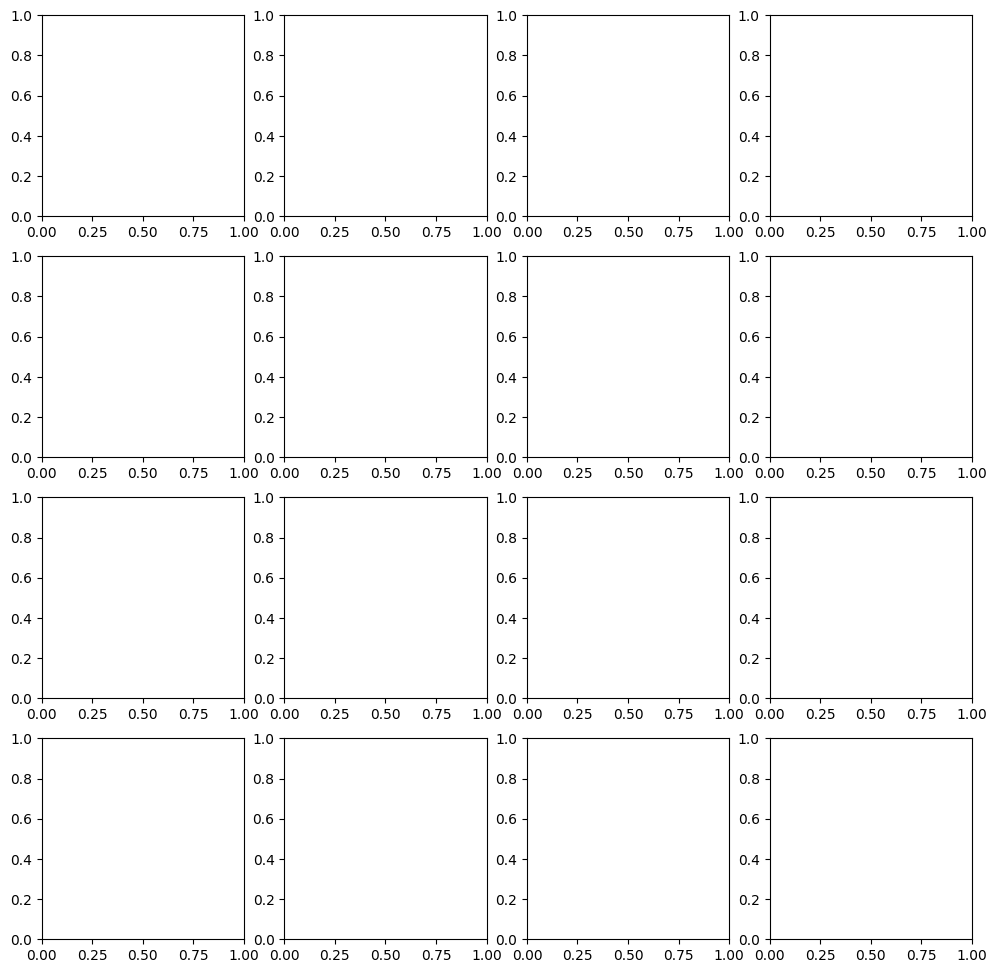

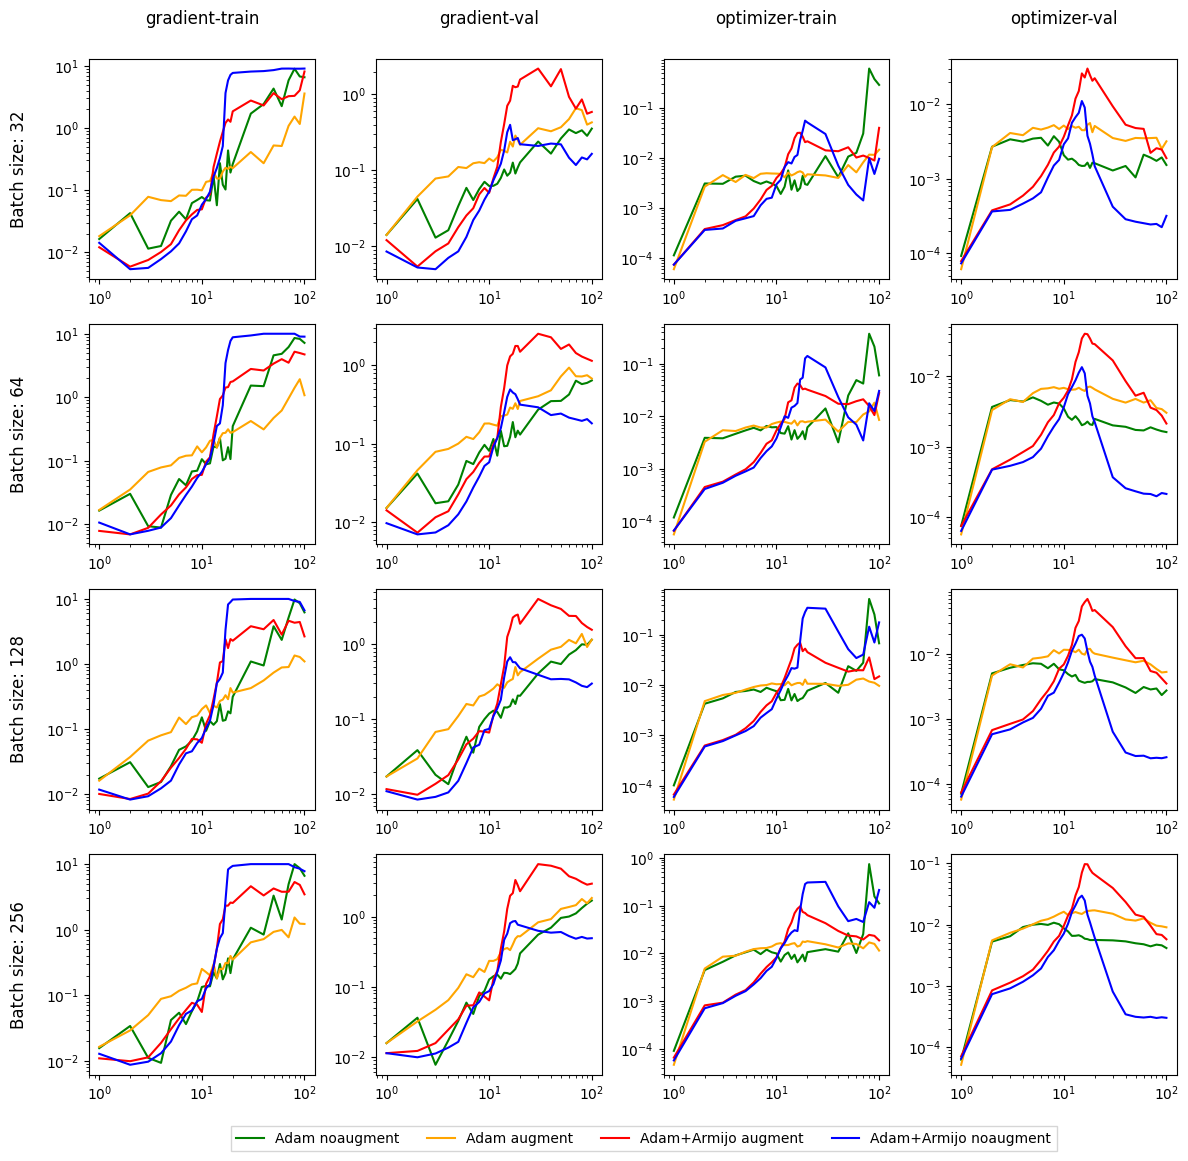

In [35]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

def read_json(path):
    with open(path) as file:
        obj = json.load(file)
    path = path.replace("_prof_", "_prof_long_")
    if not os.path.exists(path):
        return obj
    with open(path) as file:
        obj_long = json.load(file)
    for key in obj.keys():
        obj[key].extend(obj_long[key])
    return obj
paths = [
    "results/ResNet34_CIFAR10_noaugment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json",
    "results/ResNet34_CIFAR10_augment_OptimizerWrapper_Adam_0.001_prof_0/profiles_0.json",
    "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/profiles_0.json",
    "results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0/profiles_0.json",
#     "results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_0/profiles_0.json",
#     "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_0/profiles_0.json",
]
objs = [read_json(path) for path in paths]
configs = [
    {'color': 'green', 'label': 'Adam noaugment'},
    {'color': 'orange', 'label': 'Adam augment'},
    {'color': 'red', 'label': 'Adam+Armijo augment'},
    {'color': 'blue', 'label': 'Adam+Armijo noaugment'},
#     {'color': 'red', 'label': 'armijo-noagument', 'exclude_batches': [32, 64, 256]},
#     {'color': 'blue', 'label': 'armijo-augment', 'exclude_batches': [32, 64, 256]}
]

import itertools
from tqdm import tqdm

BATCH_SIZES = [32, 64, 128, 256]
DIRECTIONS = ['gradient', 'optimizer']# 'random']
PHASES = ['train', 'val']
lr_min: float = 1e-5
lr_max: float = 10
n_steps = 61
lrs = np.exp(np.linspace(np.log(lr_min), np.log(lr_max), n_steps))
epochs = list(range(0, 28, 1))
epochs_mapping = list(range(0, 20, 1)) + list(range(29, 100, 10))
samples = list(range(10))
# epochs = list(range(1,2))
def find_minima(ax, obj, BATCH_SIZE, DIRECTION, PHASE, color, label):
    approx = np.array(obj[f'{BATCH_SIZE}_{DIRECTION}_approx/{PHASE}'])
    print(BATCH_SIZE, DIRECTION, PHASE, np.mean((approx[:,:,20] - approx[:,:,10])/(lrs[20]-lrs[10]), axis=1))
    convex_arr = []
    convex_total_arr = []
    prefix = 28
    arr = np.array(obj[f'{BATCH_SIZE}_{DIRECTION}_real/{PHASE}'])
    ids = np.argmin(arr, axis=-1)
    minima = lrs[ids]
#     print(np.mean(minima, axis=1))
#     print(np.std(minima, axis=1))
    minima = np.sort(minima, axis=1)#[:,1:-1]
    return ax.plot(np.array(epochs_mapping[:prefix])+1, np.mean(minima, axis=1)[:prefix], color=color, label=label)
    

n = len(BATCH_SIZES)
dp = list(itertools.product(DIRECTIONS, PHASES))
m = len(dp)

fig, axs = plt.subplots(n, m, figsize=(3*m, 3*n))

ylims = [
    [0.5, 0.5, 0.007, 0.007],
    [0.5, 0.5, 0.01, 0.01],
    [0.5, 0.5, 0.014, 0.014],
    [0.6, 0.6, 0.02, 0.02]
]

for i, batch_size in enumerate(BATCH_SIZES):
    for j, (direction, phase) in tqdm(enumerate(dp)):
        name = f"{batch_size}-{direction}-{phase}"
        handles = []
        for obj, config in zip(objs, configs):
            if 'exclude_batches' in config and batch_size in config['exclude_batches']:
                continue
            handles_local, = find_minima(axs[i, j], obj, batch_size, direction, phase, color=config['color'], label=config['label'])
            handles.append(handles_local)
#         axs[i, j].set_title(name)
#         axs[i, j].set_ylim(0, ylims[i][j])
        axs[i, j].set_xticks([0, 100])
        axs[i, j].get_yticks()
        axs[i, j].set_yscale('log')
        axs[i, j].set_xscale('log')

rows = [
    'Batch size: 32',
    'Batch size: 64',
    'Batch size: 128',
    'Batch size: 256',
]

cols = [
    'gradient-train',
    'gradient-val',
    'optimizer-train',
    'optimizer-val'
]
        
pad = 5
for ax, col in zip(axs[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, 5*pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center', rotation=90)

plt.tight_layout()
fig.subplots_adjust(bottom=0.1)
axs[-1,-1].legend(handles = handles, labels=[config['label'] for config in configs], loc='upper right', 
             bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=4)
plt.savefig('paper/figures/profiles/minima.pdf')
plt.show()
plt.clf()

In [33]:
path = "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_many_0"

obj = read_json(f'{path}/stats.json')
x = np.array(obj["num_iterations/train"])

In [34]:
from collections import Counter
c = Counter(x)

In [40]:
ids = np.where(x > 0)[0]
ids

array([    0,  5543,  5565,  5734,  6229,  6235,  6774,  7992,  8478,
        8556,  9653,  9729, 11145, 11220, 12588, 13511, 13602, 16414,
       16462, 16777, 17161, 17360, 18245, 19994, 20168, 20350, 20550,
       20655, 20670, 20745, 20869, 21079, 21479, 21552, 21705, 21855,
       22416, 22540, 22558, 22624, 22912, 22982, 23074, 23176, 23298,
       23353, 23502, 23807, 23843, 23979, 24038, 24132, 24311, 24437,
       24656, 24960, 25018, 25536, 25591, 25894, 26437, 26438, 26818,
       26928, 26998, 27073, 27414, 27485, 27650, 28047, 28224, 28645,
       28802, 28987, 29321, 29364, 29535, 29673, 29762, 29880, 29901,
       30089, 30319, 30899, 31211, 31295, 31457, 31909, 32012, 32334,
       32721, 32808, 32957, 33245, 33390, 33622, 33691, 34287, 34525,
       34666, 34811, 34979, 35134, 35354, 35723, 35931, 36042, 36209,
       36367, 36415, 36751, 36767, 36827, 37274, 37380, 37849, 38089,
       38105, 38138, 38355, 38631, 38706, 38790])

In [50]:
ratios = []
for idx in ids[1:]:
    a = obj['loss_detailed/train'][idx]
    b = np.median(obj['loss_detailed/train'][idx-10:idx+11])
#     print(a/b)
#     print(b)
    ratios.append(a/b)
np.mean(ratios), np.percentile(ratios, [0.25, 0.5, 0.75])

(1.280110829153863, array([0.28904406, 0.30976953, 0.330495  ]))

In [59]:
a = np.argmin(obj1['128_gradient_real/train'][26], axis=1)
a, lrs[a]
obj1['128_gradient_real/train'][26]

[[0.00012297391367610544,
  0.00012297298235353082,
  0.00012297391367610544,
  0.00012297391367610544,
  0.00012297298235353082,
  0.00012297206558287144,
  0.00012297206558287144,
  0.00012297206558287144,
  0.00012297206558287144,
  0.00012297208013478667,
  0.00012296838394831866,
  0.00012297023204155266,
  0.00012296838394831866,
  0.00012296931527089328,
  0.0001229647168656811,
  0.00012296470231376588,
  0.00012296195200178772,
  0.00012296103523112833,
  0.00012295458873268217,
  0.00012294815678615123,
  0.00012294262705836445,
  0.00012293066538404673,
  0.00012291502207517624,
  0.00012290121230762452,
  0.00012288187281228602,
  0.0001228588807862252,
  0.00012282667739782482,
  0.00012278801295906305,
  0.00012273831816855818,
  0.00012267206329852343,
  0.0001225975138368085,
  0.00012249627616256475,
  0.0001223775470862165,
  0.0001222210848936811,
  0.00012202503421576694,
  0.00012178205361124128,
  0.00012147831148467958,
  0.00012109169620089233,
  0.0001206093584

In [49]:
print(pd.DataFrame(["pm"]).to_latex())

\begin{tabular}{ll}
\toprule
{} &   0 \\
\midrule
0 &  pm \\
\bottomrule
\end{tabular}



In [36]:
res_total

{'32-gradient-train': '0.73 \\pm 0.02',
 '32-gradient-val': '0.71 \\pm 0.02',
 '32-optimizer-train': '0.71 \\pm 0.02',
 '32-optimizer-val': '0.71 \\pm 0.02',
 '32-random-train': '0.68 \\pm 0.01',
 '32-random-val': '0.69 \\pm 0.01',
 '64-gradient-train': '0.78 \\pm 0.01',
 '64-gradient-val': '0.76 \\pm 0.02',
 '64-optimizer-train': '0.73 \\pm 0.01',
 '64-optimizer-val': '0.73 \\pm 0.01',
 '64-random-train': '0.71 \\pm 0.01',
 '64-random-val': '0.69 \\pm 0.01',
 '128-gradient-train': '0.79 \\pm 0.01',
 '128-gradient-val': '0.77 \\pm 0.02',
 '128-optimizer-train': '0.71 \\pm 0.01',
 '128-optimizer-val': '0.72 \\pm 0.01',
 '128-random-train': '0.68 \\pm 0.02',
 '128-random-val': '0.68 \\pm 0.01',
 '256-gradient-train': '0.84 \\pm 0.01',
 '256-gradient-val': '0.78 \\pm 0.02',
 '256-optimizer-train': '0.67 \\pm 0.01',
 '256-optimizer-val': '0.71 \\pm 0.02',
 '256-random-train': '0.71 \\pm 0.01',
 '256-random-val': '0.71 \\pm 0.01'}

In [181]:
import copy

In [182]:
import torch
from torch import nn
from torch import optim
import timm
model = timm.create_model("tf_efficientnet_b0")
a = optim.Adam(model.parameters())

In [183]:
y_pred = model(torch.randn(2, 3, 224, 224))
loss = nn.CrossEntropyLoss()(y_pred, torch.tensor([2, 3]))
loss.backward()
a.step()
a.zero_grad()

In [184]:
for g in a.state.keys():
    print(a.state[g]['exp_avg'][0,0])
    break
#     for p in g['params']:
#         print(dir(p))
#         break

tensor([[-0.0040, -0.0132,  0.0034],
        [ 0.0116,  0.0014,  0.0100],
        [-0.0142,  0.0078,  0.0119]])


In [186]:
b = copy.deepcopy(a)
y_pred = model(torch.randn(2, 3, 224, 224))
loss = nn.CrossEntropyLoss()(y_pred, torch.tensor([2, 3]))
loss.backward()
# b.step()
for g in a.param_groups:
    for p in g['params']:
        print(p.grad)
        break
for g in b.state.keys():
    print(b.state[g]['exp_avg'][0,0])
    break
for g in a.state.keys():
    print(a.state[g]['exp_avg'][0,0])
    break

tensor([[[[ 1.6069e-01, -1.6801e-01, -1.1043e-01],
          [-4.2814e-02, -1.0943e-01, -8.1602e-02],
          [-1.9906e-01,  1.4857e-01,  1.6488e-02]],

         [[-1.6947e-01,  2.2721e-02, -2.0087e-01],
          [-2.9216e-02,  3.1896e-02, -5.6351e-03],
          [ 1.4560e-02, -5.5371e-03, -1.4187e-01]],

         [[ 2.2891e-01, -3.3092e-01, -2.4109e-01],
          [-2.8172e-01, -9.5252e-02,  2.3924e-01],
          [-4.2789e-01,  2.3255e-03,  7.5765e-02]]],


        [[[-9.2741e-02,  5.4657e-01,  1.1539e-01],
          [-1.5524e-01, -1.5443e-02, -1.2387e-01],
          [ 3.3320e-01,  4.7827e-02, -4.0175e-01]],

         [[ 2.8762e-01, -8.8498e-02, -1.0480e-01],
          [ 4.6304e-01, -1.5764e-01,  2.6952e-01],
          [ 6.0335e-02,  5.1953e-02,  5.2392e-01]],

         [[-1.9190e-02, -4.1068e-01,  2.4813e-01],
          [ 3.3285e-01, -1.1551e-01, -7.2463e-01],
          [-9.3697e-02, -1.2431e-01,  1.6232e-01]]],


        [[[ 2.7448e-01, -2.4917e-01, -2.7932e-01],
          [ 7.7

In [187]:
for key, d in a.state.items():
    print(d.keys())

dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(['step', 'exp_avg', 'exp_avg_sq'])
dict_keys(

In [189]:
for g in a.param_groups:
    print(g.keys())

dict_keys(['params', 'lr', 'betas', 'eps', 'weight_decay', 'amsgrad'])


In [242]:
from typing import Dict
import json

def read_json(path: str) -> Dict:
    with open(path) as file:
        return json.load(file)

In [248]:
import os
ranking = []
for entry in os.scandir("results"):
    if "ResNet34_CIFAR10_aug" not in entry.name:
        continue
    stats = read_json(f"{entry.path}/stats.json")
    ranking.append((np.max(stats['acc/val']), entry.name))
ranking.sort(key=lambda x: x[0])
for x in ranking[::-1]:
    print(x)

(0.9338942170143127, 'ResNet34_CIFAR10_augment_Adam_0.001_OneCycleLR_0.01_1_50_0')
(0.9295873641967773, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_0.1_0')
(0.9278846383094788, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.1_1.001_Adam_1_increase_armijo_0.1_0')
(0.927584171295166, 'ResNet34_CIFAR10_augment_Adam_0.001_CosineAnnealingLR_50_0.0001_0')
(0.9247796535491943, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_normalize_increase_armijo_0.1_0')
(0.9242788553237915, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_normalize_increase_armijo_0')
(0.9235777258872986, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.1_1.001_Adam_1_increase_armijo_1_0')
(0.9220753312110901, 'ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_1_0')
(0.9211738705635071, 'ResNet34_CIFAR10_augment_Adam_0.001_0')
(0.9208734035491943, 'ResNet34_CIFAR10_augment_Adam_0.01_CosineAnnealingLR_50_0.00

In [23]:
from torchvision.datasets import FashionMNIST, CIFAR10
import numpy as np
import matplotlib.pyplot as plt

In [24]:
d = CIFAR10("./data", download=True, train=True)

Files already downloaded and verified


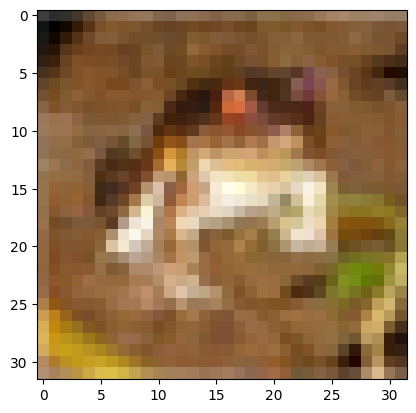

In [26]:
plt.imshow(np.array(d[0][0]))
plt.show()

In [1]:
from autoopt.data.datasets_factory import DatasetsFactory

In [2]:
d_t, d_v = DatasetsFactory().get_dataset({
    "name": "FASHION_MNIST",
    "resolution": 28,
    "path": "data"
})

In [3]:
len(d_t)

60000

In [4]:
len(d_v)

10000

In [7]:
from deepobs.scripts._tolstoi_preprocess import preprocess
preprocess("data/tolstoi")

Vocab size 82


In [6]:
!ls data/tolstoi/input.txt

input.txt


In [9]:
import numpy as np

In [23]:
np.load("data/tolstoi/train.npy").shape[0] // 50

51236

In [14]:
from deepobs.pytorch.datasets.tolstoi import tolstoi
d = tolstoi(128)

TypeError: Can't instantiate abstract class tolstoi with abstract methods _make_train_and_valid_dataloader

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
x = np.linspace(-5, 15, 100)
y = (x-6)**2/10
z = -1.2*0.2*x+3.6

allowed = x[y < z]

fig = plt.figure(figsize=(4, 4))
plt.plot(x, y, color='blue', label="$f(x - \\eta \\nabla f(x))$")
plt.plot(x, z, color='red', label="$f(x) - c \\eta ||\\nabla f(x)||^2$")
plt.fill_between(allowed, -1, 12, color=(0, 1, 0, 0.2))
plt.xlabel("$\\eta$")
plt.ylim((-1, 12))
plt.tight_layout()
plt.legend()
# plt.show()
plt.savefig("paper/figures/armijo.pdf")
plt.clf()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = True
x = np.linspace(-5, 15, 100)
y = (x-6)**2/10
z = -1.2*0.2*x+3.6 - 0.05*x**2

allowed = x[y < z]

fig = plt.figure(figsize=(4, 4))
plt.plot(x, y, color='blue', label="$f(x - \\eta \\nabla f(x))$")
plt.plot(x, z, color='red', label="$f(x) - (c \\eta + \\alpha \\eta^2)||\\nabla f(x)||^2$")
plt.fill_between(allowed, -1, 12, color=(0, 1, 0, 0.2))
plt.xlabel("$\\eta$")
plt.ylim((-1, 12))
plt.tight_layout()
plt.legend()
# plt.show()
plt.savefig("paper/figures/regarmijo.pdf")
plt.clf()

100%|██████████| 10000/10000 [04:23<00:00, 37.95it/s]


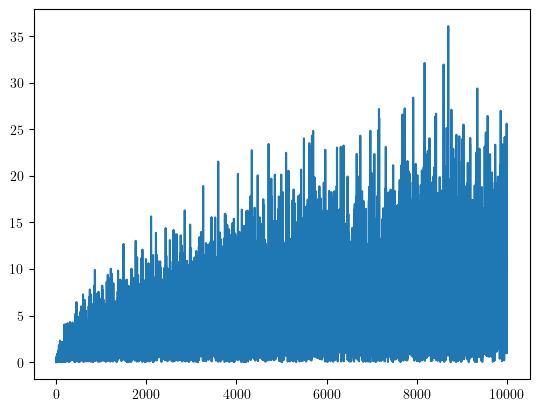

In [36]:
import numpy as np
from tqdm import tqdm
res = []
n = 10000
repeat = 100
for i in tqdm(range(n)):
    mean = 0.0
    for _ in range(repeat):
        a = np.random.randn(i)
        b = np.random.randn(i)
        mean += np.dot(a, b)
#         mean += np.abs(a*b).sum()
    res.append(np.abs(mean)/repeat)
plt.plot(np.arange(n), res)
plt.show()

In [37]:
k = 100
res = np.array(res)

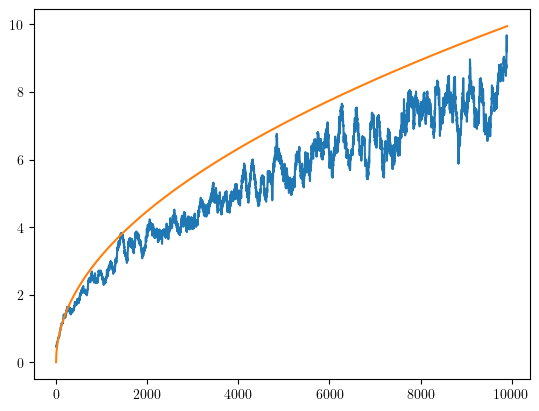

In [42]:
cum = np.cumsum(res)
running_mean = cum[k:] - cum[:-k]
n = running_mean.shape[0]
plt.plot(np.arange(n), running_mean/k)
plt.plot(np.arange(n), np.arange(n)**0.5/10)
plt.show()

In [1]:
import json
from typing import Dict
import numpy as np
import os

def read_json(path: str) -> Dict:
    with open(path) as file:
        obj = json.load(file)
    return obj

In [27]:
import json
from typing import Dict
import numpy as np
import os

def read_json(path: str) -> Dict:
    with open(path) as file:
        obj = json.load(file)
    return obj

path = "ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_3"
# path = "ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.1_1.001_Adam_1_increase_armijo_1_0"
# path = "ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_1_3"
path = "results/" + path + "/stats.json"
obj = read_json(path)
arr = np.array(obj['cosine/train'])
val = (arr < 0).sum()/arr.shape[0]
print(val)

# for entry in os.scandir("results"):
#     name = entry.name.lower()
#     if "adam" not in name or "noaugment" not in name or "armijo" not in name or "single" not in name:
#         continue
#     path = entry.path + "/stats.json"
#     obj = read_json(path)
#     arr = np.array(obj['cosine/train'])
#     val = (arr < 0).sum()/arr.shape[0]
#     print(val, name)
# #     if val > 0.01:
# #         print(val, name)
# # print(arr.min())

0.006461538461538461


In [35]:
dataset_models = [
    {
        "dataset": {
            "name": "CIFAR10",
            "resolution": 32,
            "path": "data",
            "noaugment": True,
        },
        "model": {
            "name": "ResNet34",
            "num_classes": 10
        }
    }
]

In [36]:
inner_optimizers = [
    {
        "name": "SGD",
        "lr": 1,
    },
    {
        "name": "Adagrad",
        "lr": 1,
    },
    {
        "name": "Adam",
        "lr": 1,
    }
]
cs = [0.5]
weight_decays = [None, 1, 0.1]
noaugments = [True, False]

In [52]:
import itertools
import copy
from autoopt.utils.path_utils import get_path
import os

i = 0
j = 0

for dataset_model in dataset_models:
    for inner_optimizer, c, weight_decay, noaugment in itertools.product(inner_optimizers, cs, weight_decays, noaugments):
        config = {
            **copy.deepcopy(dataset_model),
            "optimizer": {
                "name": "ArmijoLineSearch",
                "reset_strategy": "increase",
                "search_strategy": "armijo",
                "batch_strategy": "single",
                "gamma": 1.001,
                "c": c,
                "inner_optimizer": inner_optimizer,
            },
            'repeat': 0,
            'results_path': 'results'
        }
        if weight_decay is not None:
            config['optimizer']['weight_decay'] = weight_decay
        config['dataset']['noaugment'] = noaugment
        i+=1
        path = get_path(config)
        if os.path.exists(path):
            j += 1
            print("!!", path)
        print(path)
print(j, i)

results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_0
results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_0
results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_1_0
results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_1_0
results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_0.1_0
results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_SGD_1_increase_armijo_0.1_0
results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adagrad_1_increase_armijo_0
results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adagrad_1_increase_armijo_0
results/ResNet34_CIFAR10_noaugment_ArmijoLineSearch_single_0.5_1.001_Adagrad_1_increase_armijo_1_0
results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adagrad_1_increase_armijo_1_0
results/ResNet34_CIFAR10_noaugment_ArmijoLineSea

In [53]:
from torch.optim import Adagrad

In [8]:
import json
import numpy as np

def read_json(path: str) -> Dict:
    with open(path) as file:
        obj = json.load(file)
    return obj

paths = [
    [
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.1_1.01_Adam_increase_armijo_0",
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.2_1.01_Adam_increase_armijo_0",
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.5_1.01_Adam_increase_armijo_0",
    ],
    [
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.1_1.001_Adam_increase_armijo_0",
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.2_1.001_Adam_increase_armijo_0",
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.5_1.001_Adam_increase_armijo_0",
    ],
    [
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.1_Adam_keep_goldstein_0",
        "tf_efficientnet_b0_CIFAR10_augment_DistributedArmijoLineSearch_single_0.2_Adam_keep_goldstein_0",
        None
    ]
]

num_evaluations_per_step = []
acc_at_50 = []
for i, path_group in enumerate(paths):
    num_evaluations_per_step.append([])
    acc_at_50.append([])
    for j, path in enumerate(path_group):
        if path is not None:
            obj = read_json(f"results/{path}/stats.json")
            num_evaluations_per_step[i].append(1+np.mean(obj["num_iterations/train"]))
            acc_at_50[i].append(np.max(obj["acc/val"]))
        else:
            num_evaluations_per_step[i].append(0)
            acc_at_50[i].append(0)

np.array(num_evaluations_per_step), np.array(acc_at_50)

(array([[1.03466667, 1.09407051, 1.09607372],
        [1.00748718, 1.01105769, 1.01626603],
        [1.01995192, 1.42844551, 0.        ]]),
 array([[0.84244794, 0.83273238, 0.85296476],
        [0.86298078, 0.8432492 , 0.88411462],
        [0.84545273, 0.79857773, 0.        ]]))

In [57]:
path = "results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_prof_0/stats.json"

obj = read_json(path)
for key in obj.keys():
    print(key, len(obj[key]))
    obj[key] = obj[key][:len(obj[key])//2]

for key in obj.keys():
    print(key, len(obj[key]))

with open("results/ResNet34_CIFAR10_augment_ArmijoLineSearch_single_0.5_1.001_Adam_1_increase_armijo_0/stats.json", 'w') as file:
    json.dump(obj, file)

loss/train 100
loss/val 100
acc/train 100
acc/val 100
acc5/train 100
acc5/val 100
num_iterations/train 39000
num_iterations/val 0
lr/train 39000
lr/val 0
cosine/train 39000
cosine/val 0
loss_detailed/train 39000
loss_detailed/val 7800
acc_detailed/train 39000
acc_detailed/val 7800
acc5_detailed/train 39000
acc5_detailed/val 7800
prob/train 0
prob/val 0
beta1/train 0
beta1/val 0
beta2/train 0
beta2/val 0
eps/train 0
eps/val 0
weight_decay/train 0
weight_decay/val 0
direction_length/train 0
direction_length/val 0
loss/train 50
loss/val 50
acc/train 50
acc/val 50
acc5/train 50
acc5/val 50
num_iterations/train 19500
num_iterations/val 0
lr/train 19500
lr/val 0
cosine/train 19500
cosine/val 0
loss_detailed/train 19500
loss_detailed/val 3900
acc_detailed/train 19500
acc_detailed/val 3900
acc5_detailed/train 19500
acc5_detailed/val 3900
prob/train 0
prob/val 0
beta1/train 0
beta1/val 0
beta2/train 0
beta2/val 0
eps/train 0
eps/val 0
weight_decay/train 0
weight_decay/val 0
direction_length/tra

In [105]:
import numpy as np

def draw_vectors(n, d):
    x = np.random.rand(n, d-1)
    x = np.sort(x, axis=1)
    x = np.concatenate((np.zeros((n, 1)), x, np.ones((n, 1))), axis=1)
    x = x[:,1:] - x[:,:-1]
    print(x.shape)
    x = x**0.5
    x = x*(2*np.random.randint(0, 2, (n, d))-1)
    return x

def draw_vectors_2(n, d):
    x = np.random.rand(n, d-1)
    x = np.sort(x, axis=1)
    x = np.concatenate((np.zeros((n, 1)), x, np.ones((n, 1))), axis=1)
    x = x[:,1:] - x[:,:-1]
    print(x.shape)
    x = x / np.sum(x**2, axis=1, keepdims=True)**0.5
    x = x*(2*np.random.randint(0, 2, (n, d))-1)
    return x

def draw_vectors_3(n, d):
    x = np.random.rand(n, d)
    x = x / np.sum(x**2, axis=1, keepdims=True)**0.5
    x = x*(2*np.random.randint(0, 2, (n, d))-1)
    return x

def draw_vectors_4(n, d):
    x = np.random.randn(n, d)
    x = x / np.sum(x**2, axis=1, keepdims=True)**0.5
    return x

v = draw_vectors_4(5, 3)
(v**2).sum(axis=1)

array([1., 1., 1., 1., 1.])

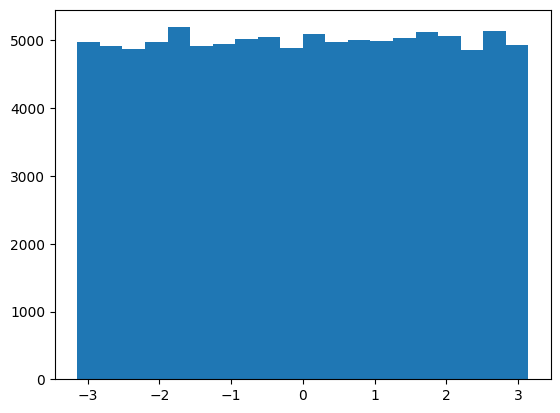

In [103]:
import matplotlib.pyplot as plt

n = 100000
v = draw_vectors_4(n, 2)
angles = np.arctan2(v[:,1], v[:,0])
bins = np.linspace(-np.pi, np.pi, 21)
plt.hist(angles, bins=bins)
plt.show()

100%|██████████| 1000/1000 [05:26<00:00,  3.06it/s]


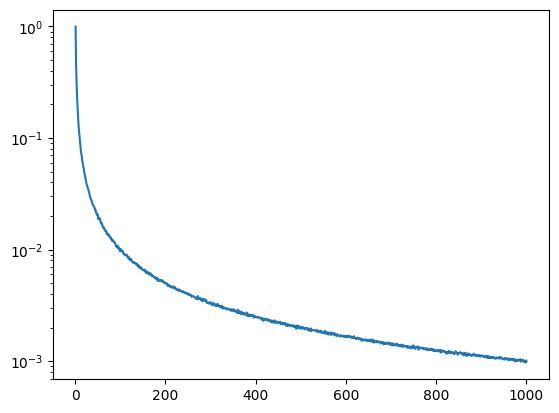

In [108]:
from tqdm import tqdm
n = 10000
d_min = 1
d_max = 1000
res = []
for d in tqdm(range(d_min, d_max+1)):
    v = draw_vectors_4(n, d)
    u = draw_vectors_4(n, d)
    dot = (v*u).sum(axis=1)
    res.append(dot.var())

plt.plot(np.arange(d_min, d_max+1), res)
plt.yscale('log')
plt.show()

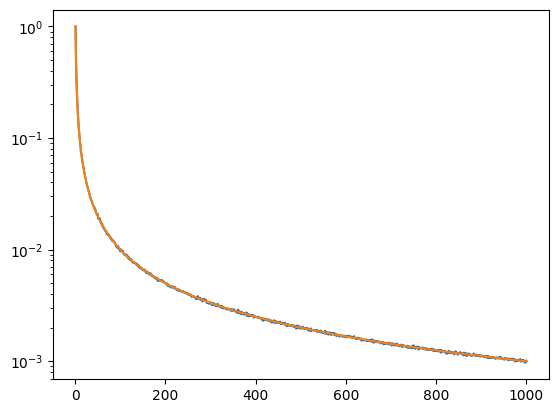

0.04460817697124219


In [112]:
d = np.arange(d_min, d_max+1)
plt.plot(d, res)
plt.plot(d, 1/d)
plt.yscale('log')
plt.show()
print(np.max(np.abs((res-1/d)/np.maximum(1/d, res))))

In [98]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

In [12]:
from autoopt.optimizers.extended_optimizer import ExtendedOptimizer
from autoopt.models.small.small_resnet_20 import SmallResnet20

model = SmallResnet20(10)
opt = ExtendedOptimizer(model.parameters(), {})
# opt._turn_off_batchnorms_accumulation(model)
# opt._turn_on_batchnorms_accumulation(model)

In [13]:
model.model[1]

BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)